## ***Predict Underwriting Score for approving or rejecting the policy against Autism Spectrum Disorder(ASD) in Chidren, Adolescents and Adults*** 

---

![home_page](signs_of_autism1.jpg)

---

## **Contents**

1. [Background](#Background)
1. [ASD in Canada](#ASD_in_Canada)
    1. [References](#References)
1. [Business Impact](#Business_Impact)
    1. [Solution design](#Solution_Design)
1. [Setup](#Setup)
1. [Import Data](#Dataset)
1. [Exploratory Data Analysis](#Exploratory_Data_Analysis)
1. [Data Pre-processing](#Data_Preprocessing)
1. [Train](#Train)
    1. [Sagemaker Training Job](#Another_approach_for_Training)
1. [Predict](#Predict)
    1. [Confusion Matrix](#Confusion_Matrix)
    1. [ROC Curve](#ROC_Curve)
1. [Underwriting Score](#Probabilistic_Underwriting_Score)


---


## ***Background***

### **What is Autism Spectrum Disorder?**

* Autism spectrum disorder (ASD) is a developmental disability  that can cause significant social, communication and behavioral challenges. 
* There is often nothing about how people with ASD look that sets them apart from other people, but people with ASD may communicate, interact, behave, and learn in ways that are different from most other people. 
* The learning, thinking, and problem-solving abilities of people with ASD can range from gifted to severely challenged. Some people with ASD need a lot of help in their daily lives; others need less.
* A diagnosis of ASD now includes several conditions that used to be diagnosed separately: autistic disorder, pervasive developmental disorder not otherwise specified (PDD-NOS), and Asperger syndrome. These conditions are now all called autism spectrum disorder.

### **Signs and Symptoms**

People with ASD often have problems with social, emotional, and communication skills. Signs of ASD begin during early childhood and typically last throughout a person’s life.

**Children or adults with ASD might:**

* not point at objects to show interest (for example, not point at an airplane flying over)
* not look at objects when another person points at them
* have trouble relating to others or not have an interest in other people at all
* avoid eye contact and want to be alone
* have trouble understanding other people’s feelings or talking about their own feelings
* prefer not to be held or cuddled, or might cuddle only when they want to
* appear to be unaware when people talk to them, but respond to other sounds
* be very interested in people, but not know how to talk, play, or relate to them
* repeat or echo words or phrases said to them, or repeat words or phrases in place of normal language
* have trouble expressing their needs using typical words or motions
* not play “pretend” games (for example, not pretend to “feed” a doll)
* repeat actions over and over again
* have trouble adapting when a routine changes
* have unusual reactions to the way things smell, taste, look, feel, or sound
* lose skills they once had (for example, stop saying words they were using)

### **Diagnosis**

Diagnosing ASD can be difficult since there is no medical test, like a blood test, to diagnose the disorders. Doctors look at the child’s behavior and development to make a diagnosis.

ASD can sometimes be detected at 18 months or younger. By age 2, a diagnosis by an experienced professional can be considered very reliable. **However, many children do not receive a final diagnosis until much older.** This delay means that children with ASD might not get the early help they need.

### **Treatment**

* There is currently no cure for ASD. However, research shows that early intervention treatment services can improve a child’s development. 
* Early intervention services help children from birth to 3 years old (36 months) learn important skills. Services can include therapy to help the child talk, walk, and interact with others. Therefore, it is important to talk to your child’s doctor as soon as possible if you think your child has ASD or other developmental problem.
* In addition, treatment for particular symptoms, such as speech therapy for language delays, often does not need to wait for a formal ASD diagnosis.


---


## ***ASD_in_Canada***
### **Autism Prevalence among Children and Youth in Canada**

In **Canada**, among children and youth 5-17 years of age:

* An estimated 1 in 66 have been diagnosed with ASD
* Males were identified with ASD 4x more frequently than females. One in 42 males & One in 165 females were diagnosed with ASD.
* More than half of children and youth (56%) had received their diagnosis by age 6; and more than 90% of children and youth were diagnosed by age 12.

![pic1](Infographic_ASD_pic.JPG)


---


## ***References***

* **Autism services in Ontario could add 952 million(CAD Dollar)** : https://medium.com/@scottcorbett_34724/how-insurance-could-add-952-million-for-autism-services-in-ontario-51b609d15379

* **SunLife Mental Wellness** : https://www.sunlife.ca/ca/Tools+and+Resources/Health+and+Wellness/Mental+wellness/Is+your+child+on+the+autism+spectrum?vgnLocale=en_CA

* **Latest Strategy from The Province of Canada** : https://globalnews.ca/news/5117251/national-autism-strategy-blueprint/
    * The province announced it will provide funding directly to parents of children with autism instead of to regional service providers.
    * With the new changes, Ontario families with an autistic child would receive 20,000 CAD Dollar a year until their child turns six. After the age of six,
    families would receive 5,000 CAD Dollar a year until their child turns 18.
    * Initially, only families with an adjusted annual net income of under 55,000 CAD Dollar would have been eligible for the maximum funding, with funding
    amounts for families determined on a sliding scale up to an income of 250,000 CAD Dollar.
  

* **Canada Government** : https://www.canada.ca/en/public-health/services/publications/diseases-conditions/autism-spectrum-disorder-children-youth-canada-2018.html

* **ASD Info** : 
    * https://www.cdc.gov/ncbddd/autism/facts.html
    * https://www.mayoclinic.org/diseases-conditions/autism-spectrum-disorder/symptoms-causes/syc-20352928


---


## ***Business_Impact***
#### **1. Underwriting score for Health/Disability/LTC Insurances**

Based on the 10 questionnaires and other supporting variables a probabilistic underwriting score is getting predicted for approving or rejecting the policy against ASD in the children, adolescents and adults.

Refer to <***Autism DataSet Description.docx***> for the 10 questionnaires and supporting variables.

#### **2. Helps Actuarial to fluctuate the premium amount**
By using a threshold value along with the score generated by model helps the actuarial to increase or decrease the premium amount as per the case. 


---


## ***Solution_Design***

![pic2](Solution_design.JPG)


---


## ***Setup***

Let's start by specifying:

* The **SageMaker role arn** used to give learning and hosting access to the dataset. 
* The **S3 bucket** is used for training and storing model objects.

#### ***Import Sagemaker Library***

In [1]:
import sagemaker

In [2]:
sess = sagemaker.Session()

#### ***Import Execution Role***

In [3]:
from sagemaker import get_execution_role

In [4]:
role = get_execution_role()

In [5]:
print(role)

arn:aws:iam::685819979248:role/service-role/AmazonSageMaker-ExecutionRole-20200229T161385


#### ***Setting up the connectivity with S3 bucket***

In [6]:
import boto3

In [7]:
prefix = 'sagemaker/UW_for_ASD'

In [8]:
bucket = sess.default_bucket()
file_name = 'Autism_Child_data_in_excel.xlsx'
s3_file = 's3://{}/{}'.format(bucket,file_name)

In [9]:
print(s3_file)

s3://sagemaker-us-east-1-685819979248/Autism_Child_data_in_excel.xlsx


##### Project files are placed at ***sagemaker-us-east-1-685819979248***

#### ***Import required libraries***

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import seaborn as sns
import os, re
import category_encoders as ce

%matplotlib inline

#### ***Setting up the Pandas display parameters***

In [11]:
pd.set_option('display.max_columns',45)

In [12]:
pd.set_option('display.max_rows',200)

# **_Dataset_**

***Source: UCI ML Repository***
* http://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult
* http://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++
* http://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++

#### ***Creating DataFrame from S3 File***

In [13]:
with open('Col_names.txt','r') as file:
    cols = file.read()
    
col_names = cols.replace("\n",'').split(',')

In [14]:
ASD_Child = pd.read_excel(s3_file,sheet_name='Autism_Child',names=col_names)
ASD_Adolescent = pd.read_excel(s3_file,sheet_name='Autism_Adolscent',names=col_names)
ASD_Adult = pd.read_excel(s3_file,sheet_name='Autism_Adult',names=col_names)

#### ***Merging DataFrames***

In [15]:
ASD_df = pd.concat([ASD_Child,ASD_Adolescent,ASD_Adult],axis=0)

In [16]:
ASD_df.shape

(1100, 21)

In [17]:
ASD_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            694, 695, 696, 697, 698, 699, 700, 701, 702, 703],
           dtype='int64', length=1100)

##### As the DataFrame Index is from 0 to 703, however, the records are 1100. So, we need to reset the index of the DataFrame.

In [18]:
ASD_df.reset_index(drop=True,inplace=True)

# ***Exploratory_Data_Analysis***

In [19]:
ASD_df.head()

,age,gender,ethnicity,jaundice,parents_with_autism,whos_taking_test,country_of_res,used_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6,m,Others,no,no,Parent,Jordan,no,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
1,6,m,'Middle Eastern ',no,no,Parent,Jordan,no,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
2,6,m,?,no,no,?,Jordan,yes,'4-11 years',1,1,0,0,0,1,1,1,0,0,5,NO
3,5,f,?,yes,no,?,Jordan,no,'4-11 years',0,1,0,0,1,1,0,0,0,1,4,NO
4,5,m,Others,yes,no,Parent,'United States',no,'4-11 years',1,1,1,1,1,1,1,1,1,1,10,YES


In [20]:
ASD_df_eda = ASD_df.iloc[:,:]

#### **Q1. Does ASD is prevalent only in early childhood or occurs after a particular age?**

In [21]:
ASD_df_eda = ASD_df_eda.applymap(lambda val: np.NaN if val =='?' else val)
ASD_df_eda['age'] = ASD_df_eda['age'].astype('float')
ASD_df_eda['ASD_Label'] = ASD_df_eda['ASD_Label'].apply(lambda val: 0 if val=='NO' else 1)

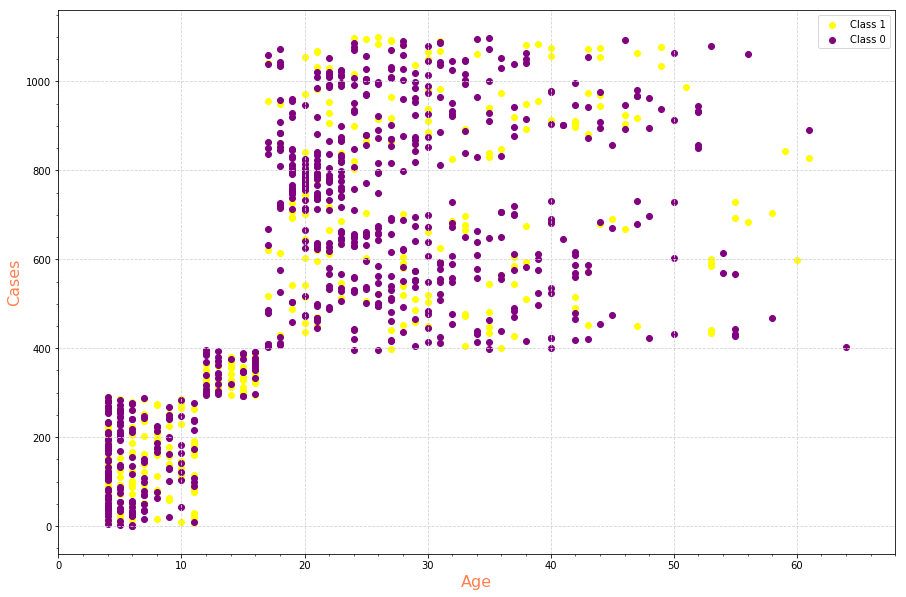

In [22]:
l_font = {'size':16,'color':'coral'}

plt.figure(figsize=(15,10))
plt.scatter(x='age',y=ASD_df_eda[(ASD_df_eda['ASD_Label']==1)].index,c='yellow',data=ASD_df_eda[(ASD_df_eda['ASD_Label']==1)],label='Class 1')
plt.scatter(x='age',y=ASD_df_eda[(ASD_df_eda['ASD_Label']==0)].index,c='purple',data=ASD_df_eda[(ASD_df_eda['ASD_Label']==0)],label='Class 0')
plt.minorticks_on()
plt.grid(which='major',linestyle='--',color='lightgray')
plt.axis(xmin=0,xmax=68)
plt.xlabel("Age",fontdict=l_font)
plt.ylabel("Cases",fontdict=l_font)
plt.legend()

#### **Q2. How much ASD in prevalent among males and females?**

In [23]:
ASD_gender_label_df = pd.DataFrame(ASD_df_eda.groupby(['gender','ASD_Label']).count()['Q1_Score'])
ASD_gender_label_df.reset_index(inplace=True)

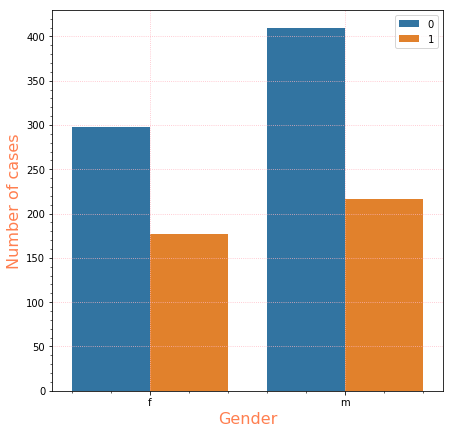

In [24]:
plt.figure(figsize=(7,7))
sns.barplot(x='gender',y='Q1_Score',hue='ASD_Label',data=ASD_gender_label_df)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel("Gender",fontdict=l_font)
plt.ylabel("Number of cases",fontdict=l_font)
plt.legend()

#### **Q3. In which age group ASD is more popular or prevalent?**

In [25]:
age_grp_label_df = pd.DataFrame(ASD_df_eda.groupby(['age_desc','ASD_Label']).count()['Q1_Score'])
age_grp_label_df.reset_index(inplace=True)

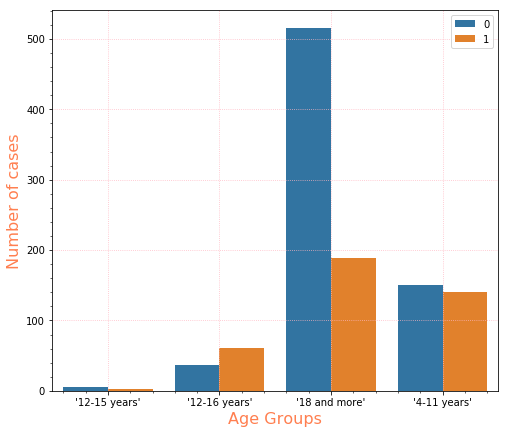

In [26]:
plt.figure(figsize=(8,7))
sns.barplot(x='age_desc',y='Q1_Score',hue='ASD_Label',data=age_grp_label_df)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel("Age Groups",fontdict=l_font)
plt.ylabel("Number of cases",fontdict=l_font)
plt.legend()

#### This shows us that majority of the records in our dataset belong to Adults category. Also, positive diagnosis of ASD is more in the early childhood. 

#### **Q4. Does PARENTS_WITH_AUTISM plays any crucial role in identifying ASD in children?**

In [27]:
parents_label_df = pd.DataFrame(ASD_df_eda.groupby(['parents_with_autism','ASD_Label']).count()['gender'])
parents_label_df.reset_index(inplace=True)

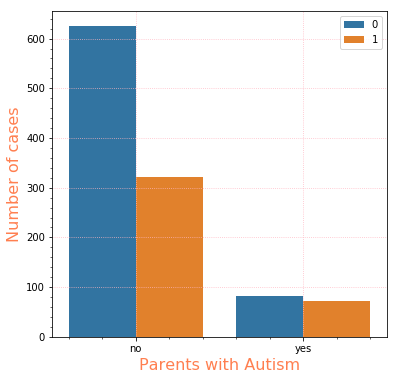

In [28]:
plt.figure(figsize=(6,6))
sns.barplot(x='parents_with_autism',y='gender',hue='ASD_Label',data=parents_label_df)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel("Parents with Autism",fontdict=l_font)
plt.ylabel("Number of cases",fontdict=l_font)
plt.legend()

#### This shows us that when parents are the carrier of ASD then the risk of transmission to their children is high.

#### **Q5. Which countires in this dataset has number of ASD cases?**

In [29]:
country_label_df = pd.DataFrame(ASD_df_eda.groupby(['country_of_res','ASD_Label']).count()['Q1_Score'])
country_label_df.reset_index(inplace=True)

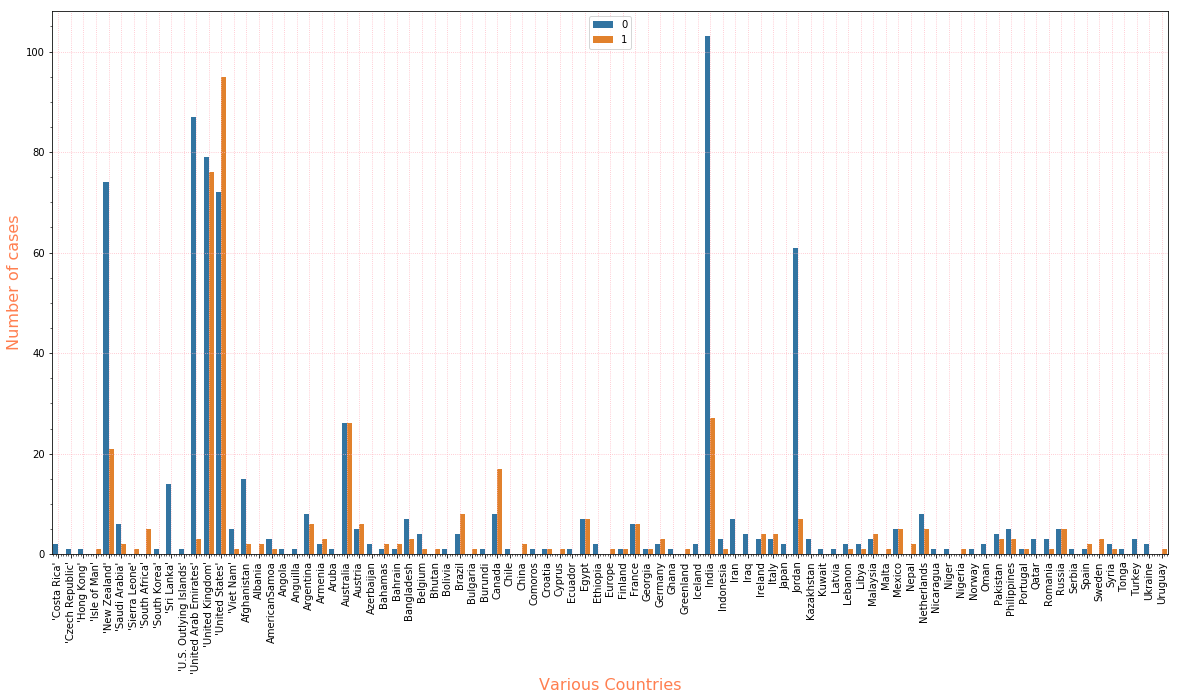

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='country_of_res',y='Q1_Score',hue='ASD_Label',data=country_label_df)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel("Various Countries",fontdict=l_font)
plt.ylabel("Number of cases",fontdict=l_font)
plt.xticks(rotation=90)
plt.legend()

#### UAE, New Zealand, India and Jordan are the countries where the ratio b/w ASD -ve are high as compared to ASD +ve cases. However, UK and US it is quite opposite.

#### **Q6. In which ethnicites number of ASD positive cases are high?**

In [31]:
ASD_df_eda['ethnicity'] = ASD_df_eda['ethnicity'].apply(lambda val: str(val).replace("'",'').strip().capitalize())
ethnicity_label_df = pd.DataFrame(ASD_df_eda.groupby(['ethnicity','ASD_Label']).count()['Q1_Score'])
ethnicity_label_df.reset_index(inplace=True)

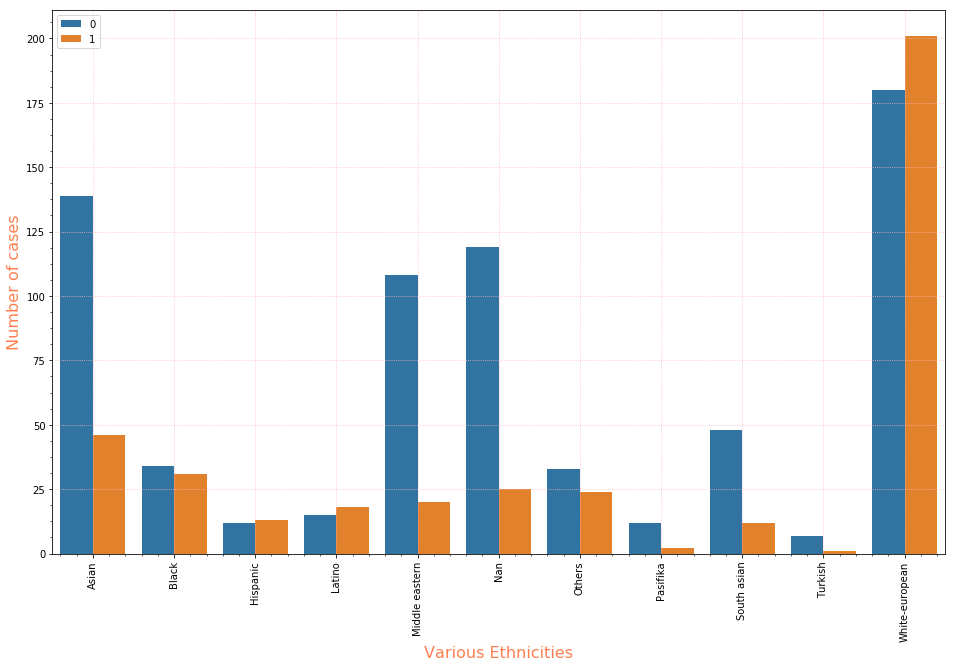

In [32]:
plt.figure(figsize=(16,10))
sns.barplot(x='ethnicity',y='Q1_Score',hue='ASD_Label',data=ethnicity_label_df)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel("Various Ethnicities",fontdict=l_font)
plt.ylabel("Number of cases",fontdict=l_font)
plt.xticks(rotation=90)
plt.legend()

#### From this dataset, we found that **Black, Hispanic, Latino and White-European** groups children has higher risk of ASD.

#### **Q7. Does children born with Jaundice has higher risk of ASD?**

In [33]:
jaundice_label_df = pd.DataFrame(ASD_df_eda.groupby(['jaundice','ASD_Label']).count()['Q1_Score'])
jaundice_label_df.reset_index(inplace=True)

In [34]:
jaundice_label_df

,jaundice,ASD_Label,Q1_Score
0,no,0,616
1,no,1,319
2,yes,0,91
3,yes,1,74


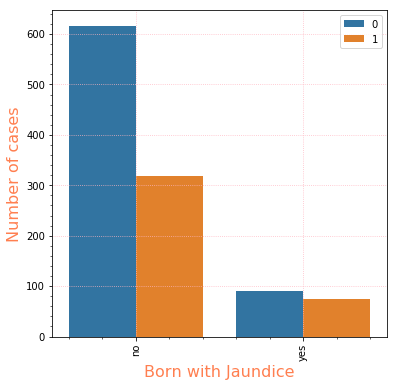

In [35]:
plt.figure(figsize=(6,6))
sns.barplot(x='jaundice',y='Q1_Score',hue='ASD_Label',data=jaundice_label_df)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='lightpink')
plt.xlabel("Born with Jaundice",fontdict=l_font)
plt.ylabel("Number of cases",fontdict=l_font)
plt.xticks(rotation=90)
plt.legend()

# ***Data_Preprocessing***

In [36]:
ASD_df.head()

,age,gender,ethnicity,jaundice,parents_with_autism,whos_taking_test,country_of_res,used_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6,m,Others,no,no,Parent,Jordan,no,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
1,6,m,'Middle Eastern ',no,no,Parent,Jordan,no,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
2,6,m,?,no,no,?,Jordan,yes,'4-11 years',1,1,0,0,0,1,1,1,0,0,5,NO
3,5,f,?,yes,no,?,Jordan,no,'4-11 years',0,1,0,0,1,1,0,0,0,1,4,NO
4,5,m,Others,yes,no,Parent,'United States',no,'4-11 years',1,1,1,1,1,1,1,1,1,1,10,YES


#### ***Data Type Handling***

In [37]:
ASD_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
age                    1100 non-null object
gender                 1100 non-null object
ethnicity              1100 non-null object
jaundice               1100 non-null object
parents_with_autism    1100 non-null object
whos_taking_test       1100 non-null object
country_of_res         1100 non-null object
used_app_before        1100 non-null object
age_desc               1100 non-null object
Q1_Score               1100 non-null int64
Q2_Score               1100 non-null int64
Q3_Score               1100 non-null int64
Q4_Score               1100 non-null int64
Q5_Score               1100 non-null int64
Q6_Score               1100 non-null int64
Q7_Score               1100 non-null int64
Q8_Score               1100 non-null int64
Q9_Score               1100 non-null int64
Q10_Score              1100 non-null int64
screening_score        1100 non-null int64
ASD_Label              1

##### Age, Gender, Jaundice, Parents_with_autism, Used_app_before and ASD_Label needs to be converted to INT datatype. 
##### Gender, Jaundice, Parents_with_autism, Used_app_before and ASD_Label can be treated with Binary or Nominal encoding.

### **MISSING values occurence in dataset variables**

In [38]:
ASD_df.isin(['?']).sum()

age                      6
gender                   0
ethnicity              144
jaundice                 0
parents_with_autism      0
whos_taking_test       144
country_of_res           0
used_app_before          0
age_desc                 0
Q1_Score                 0
Q2_Score                 0
Q3_Score                 0
Q4_Score                 0
Q5_Score                 0
Q6_Score                 0
Q7_Score                 0
Q8_Score                 0
Q9_Score                 0
Q10_Score                0
screening_score          0
ASD_Label                0
dtype: int64

##### Here, we came to know that **AGE** has 6, **ETHNICITY** and **WHOS_TAKING_TEST** has 144 MISSING values(**'?'**).
##### For now, I'll replace the missing values in **AGE** with None and later on build a Regression Model to actually predict these values.

In [39]:
def replace_missing_vals(df_name):
    """
    Description: This function is created for replacing the missing value by np.NaN
    
    Input parameter: It accepts only one input parameter:
        1. df_name: Dataframe in which missing values to be removed
    
    Return: Modified dataframe with no missing values '?'
    """
    cols = df_name.columns
    for col in cols:
        if df_name[col].dtype == 'O':
            df_name[col] = df_name[col].apply(lambda val: np.NaN if val == '?' else val)
        else:
            None
    return df_name

In [40]:
ASD_df = replace_missing_vals(ASD_df)

#### ***Fixing AGE variable***

In [41]:
ASD_df['age'].isin(['?']).sum()

0

In [42]:
ASD_df['age'].isna().sum()

6

In [43]:
pd.DataFrame(ASD_df['age'].describe())

,age
count,1094.000000
mean,22.073126
std,16.879373
min,4.000000
25%,11.000000
50%,21.000000
75%,30.000000
max,383.000000


##### Here, I found that Age of one of the patients is 383 and it seems like a typing error. And, a potential candidate for an Outlier.

##### ***Finding the AGE values for some quantiles***

In [44]:
quantiles = [0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,0.98,0.99]

In [45]:
ASD_df['age'].quantile(quantiles)

0.15     6.00
0.25    11.00
0.35    16.00
0.45    20.00
0.55    22.00
0.65    26.00
0.75    30.00
0.85    35.05
0.95    46.00
0.98    53.00
0.99    55.00
Name: age, dtype: float64

In [46]:
ASD_df['age'].sort_values(ascending=False).head()

448    383.0
403     64.0
827     61.0
891     61.0
599     60.0
Name: age, dtype: float64

In [47]:
def box_plot(df,col):
    """
    Description: This function is created for plotting the Box or Whisker plot for visualizing the outliers in any variable.
    
    Input Parameters: It accepts two input parameters:
        1. df: DataFrame
        2. col: Feature name
    
    Return/Output: Plots the feature whisker plot
    """
    font = {'color': 'Blue',
#             'family': 'Calibri',
            'size': 16}
    
    plt.figure(figsize=(9,7))
    plt.boxplot(df[~df[col].isna()][col])
    plt.minorticks_on()
    plt.grid(which='major',linestyle="--",color='gray')
    plt.xlabel('Feature : '+col,fontdict=font)
    plt.title('Visualizing the outliers in '+col+' variable',fontdict=font)
    plt.show()
    print('\n')
    
def val_iqr_limits(df_name,col_name,w_width=None):
    """
    Description: This function is created for calculating the upper and lower limits using Tuky's IQR method.
    
    Input parameters: It accepts below two input parameters:
        1. df_name: DataFrame
        2. col_name: Feature name
        3. w_width: Whisker width provided by user and by default 1.5 
        
    Return: It returns the median, upper and lower limits of the feature based on Tuky's IQR method.
    """
    if w_width == None:
        w_width = 1.5
    else:
        w_width = w_width
        
    val_median = df_name[col_name].median()
    q1 = df_name[col_name].quantile(0.25)
    q3 = df_name[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (w_width*iqr)
    upper_limit = q3 + (w_width*iqr)
#     print(val_median,q1,q3,iqr,lower_limit,upper_limit)     ## Uncomment if you want to see the values of median, q1, q2, iqr, lower and upper limit 
    return val_median, upper_limit, lower_limit

def fix_outliers(df_name,col_name,whis_width=None):
    """
    Description: This function is created for applyng the Tuky's IQR method on variable.
    
    Input parameters: It accepts the below two parameters:
        1. df_name: DataFrame
        2. col_name: Feature name
        3. whis_width: Whisker width provided by user and by default 1.5 
    
    Return: It returns the modified feature with the removed outliers.
    """
    feature_scale_desc_stats(df_name,col_name,[None])
    box_plot(df_name,col_name)
    
    print("######## Applied Tuky IQR Method-I ########\n")
    v_median, upr_limit , low_limit = val_iqr_limits(df_name,col_name,whis_width)
    new_col = 'Fixed_Outliers_'+col_name
    df_name[new_col] = df_name[col_name].apply(lambda val: (v_median + np.sqrt(val)) if val > upr_limit else (v_median - np.sqrt(np.sqrt(np.square(val)))) if val < low_limit else val)
    feature_scale_desc_stats(df_name,new_col,[None])
    box_plot(df_name,new_col)
    
    print("######## Applied Tuky IQR Method-II ########\n")
    v1_median, upr_limit1, low_limit1 = val_iqr_limits(df_name,new_col,whis_width)
    df_name[new_col] = df_name[new_col].apply(lambda val: upr_limit1 if val > upr_limit1 else low_limit1 if val < low_limit1 else val)
    feature_scale_desc_stats(df_name,new_col,[None])
    box_plot(df_name,new_col)
    
    print("$$$$$$$$ Removed Outliers from",col_name,"and created its new variable",new_col, '$$$$$$$$\n')

In [48]:
def feature_scale_desc_stats(df, col, scaler=None, scale_col=False, scaler_to_use=False):
    """
    Description: This function will perform below tasks:
        - Plot the Feature Distribution
        - Descriptive statistics of a Feature
        - Apply the different SCALERS on feature
        - PLOT the Distribution of each Scaler on Feature
        - Descriptive statistics of a Scaled Feature
    
    Input Parameters: It accepts two input parameters:
        1. df: DataFrame of imported dataset
        2. col: Feature name which needs to be examined
        3. scaler: Different scalers whose change we want to visualize
        4. scale_col: Flag by which we identifies whether scaler to be applied
        5. scaler_to_use: Scaler to be used for scaling the variable
    
    Return/Output: It plots the feature distribution and provides it descriptive stats
    """
    def select_transformer(trans_flag):
        """
        Description: This function is created for identifying the kind of transformation to be applied.
        
        Input parameters: It accepts only one parameter:
        1. trans_flag: Flag for identifying the scaler('ss','rs','mms')    
        
        Return/Output: Transformer object
        """
        if str(trans_flag).lower() == 'ss':
            from sklearn.preprocessing import StandardScaler as SS
            ss = SS()
            return ss
        elif str(trans_flag).lower() == 'rs':
            from sklearn.preprocessing import RobustScaler as RS
            rs = RS()
            return rs
        elif str(trans_flag).lower() == 'mms':
            from sklearn.preprocessing import MinMaxScaler as MMS
            mms = MMS()
            return mms
        elif trans_flag == None:
            return None
        
    def hist_plt(df_name,col_name,dist_form):
        """
        Description: This function is created for plotting the feature distribution
        
        Input parameters: It accepts 3 input parameters:
        1. df_name: DataFrame of imported dataset
        2. col_name: Feature name which needs to be examined
        3. dist_form: Kind of the operation applied on the feature
    
        Return/Output: It plots the feature distribution
        """
        font = {'color': 'blue',
#             'family':'Calibri',
            'size':16}
    
        plt.figure(figsize=(9,7))
        plt.hist(df_name[~df_name[col_name].isna()][col_name],color='orange')
        plt.minorticks_on()
        plt.grid(which='major',linestyle='--',color='gray')
        plt.xlabel('Feature name is '+ col_name, fontdict=font)
        plt.title(dist_form +' Form -- Distribution plot of '+ col_name, fontdict=font)
        plt.show()
        
    def plot_org_and_scaled_dist(df_name,col_name,scaler):
        """
        Description: This function is created for providing the descriptive statistics, applying the transformation on feature and plotting feature distribution using another function.
        
        Input parameters: It accepts 3 input parameters:
        1. df_name: DataFrame of imported dataset
        2. col_name: Feature name which needs to be examined
        3. scaler: Scaler object
    
        Return/Output: It plots the feature distribution using another function and prints the descriptive stats
        """
        if scaler == None:
            dist_form = 'Original'
            print('\nDescriptive Statistics of Feature {} in {} Form.'.format(col_name,dist_form))
            print(df_name[col_name].describe(),'\n')
            hist_plt(df_name,col_name,dist_form)
        else:
            scaled_df = pd.DataFrame(scaler.fit_transform(df_name[[col_name]]))
            scaled_df.columns = [col_name]
            dist_form = str(scaler).split("(")
            print('\nDescriptive Statistics of Feature {} in {} Form.'.format(col_name,dist_form[0]))
            print(scaled_df[col_name].describe(),'\n')
            hist_plt(scaled_df,col_name,dist_form[0])
            
    def apply_scaler(df_name,col_name,scaler):
        """
        Description: This function is created for applying the scaler on variable.
        
        Input parameters: It accepts 3 input parameters:
        1. df_name: DataFrame of imported dataset
        2. col_name: Feature name which needs to be examined
        3. scaler: Scaler object
    
        Return/Output: Creates new column with scaled values of the variable.
        """
        print('\nDescriptive Statistics of Feature {}.'.format(col_name))
        print(df_name[col_name].describe(),'\n')
        hist_plt(df_name,col_name,'')
        box_plot(df_name,col_name)
                
        scaled_col_name = col_name + '_Scaled'
        df_name[scaled_col_name] = scaler.fit_transform(df_name[[col_name]])
        dist_form = str(scaler).split("(")
        print('Descriptive Statistics of Feature {}.'.format(scaled_col_name))
        print(df_name[scaled_col_name].describe(),'\n')
        hist_plt(df_name,scaled_col_name,dist_form[0])
        box_plot(df_name,scaled_col_name)
        print('##### Scaled variable {} added in the DataFrame #####\n'.format(scaled_col_name))
            
    if scale_col == False:
        for val in scaler:
            plot_org_and_scaled_dist(df,col,select_transformer(val))
    elif scale_col == True:
        scaler = scaler_to_use
        apply_scaler(df,col,select_transformer(scaler))


Descriptive Statistics of Feature age in Original Form.
count    1094.000000
mean       22.073126
std        16.879373
min         4.000000
25%        11.000000
50%        21.000000
75%        30.000000
max       383.000000
Name: age, dtype: float64 



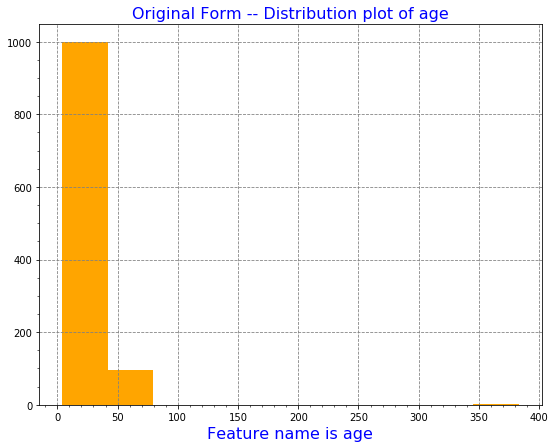

In [49]:
feature_scale_desc_stats(ASD_df,'age',[None])

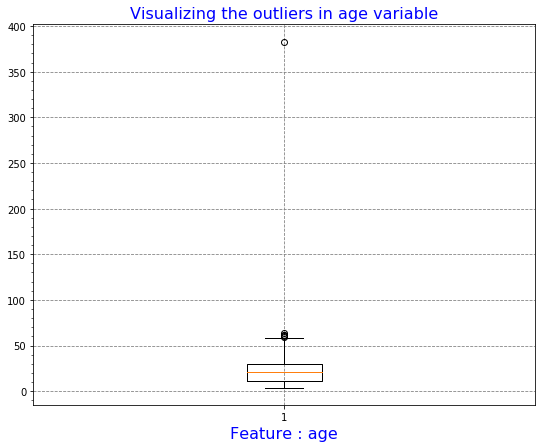

In [50]:
box_plot(ASD_df,'age')

##### In AGE variable, below activites needs to be performed after cleaning rest of the variables:
* Predict Null values
* Handle Outliers
* Perform scaling

#### ***Fixing GENDER variable***

In [51]:
ASD_df['gender'].value_counts()

m    625
f    475
Name: gender, dtype: int64

##### In GENDER variable, we have two Categories M(Male) and F(Female). As, it is a Nominal feature thus encoding M as 1 and F as 0.

In [52]:
def feature_encoding(df,col,encoding_flg):
    """
    Description: This function is created for applying the Binary/Ordinal/OneHot/Label Encoding on a feature.
    
    Input parameters: It accepts below 2 parameters:
        - df: Pandas DataFrame.
        - col: Feature name which needs to be binary encoded.
        - encoding_flg: Holds the single alphabet value(either 'b','o','oh' or 'l') for identifying the type of encoding to be applied.

    Return: It returns the modified DataFrame.
    """
    if encoding_flg == 'b':
        BE = ce.BinaryEncoder(cols=col)
        df = BE.fit_transform(df)
        return df
    elif encoding_flg == 'o':
        OE = ce.OrdinalEncoder(cols=col)
        df = OE.fit_transform(df)
        return df
    elif encoding_flg == 'oh':
        OHE = ce.OneHotEncoder(cols=col)
        df = OHE.fit_transform(df)
        return df
    elif encoding_flg == 'l':
        from sklearn.preprocessing import LabelEncoder
        LBE = LabelEncoder()
        df[col] = LBE.fit_transform(df[col])
        return df

In [53]:
Cleaned_ASD_df = feature_encoding(ASD_df,'gender','oh')

In [54]:
Cleaned_ASD_df.head()

,age,gender_1,gender_2,ethnicity,jaundice,parents_with_autism,whos_taking_test,country_of_res,used_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6.0,1,0,Others,no,no,Parent,Jordan,no,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
1,6.0,1,0,'Middle Eastern ',no,no,Parent,Jordan,no,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
2,6.0,1,0,NaN,no,no,NaN,Jordan,yes,'4-11 years',1,1,0,0,0,1,1,1,0,0,5,NO
3,5.0,0,1,NaN,yes,no,NaN,Jordan,no,'4-11 years',0,1,0,0,1,1,0,0,0,1,4,NO
4,5.0,1,0,Others,yes,no,Parent,'United States',no,'4-11 years',1,1,1,1,1,1,1,1,1,1,10,YES


In [55]:
Cleaned_ASD_df['gender_1'].value_counts()

1    625
0    475
Name: gender_1, dtype: int64

In [56]:
Cleaned_ASD_df['gender_2'].value_counts()

0    625
1    475
Name: gender_2, dtype: int64

#### ***Finding Co-relations b/w Gender variables***

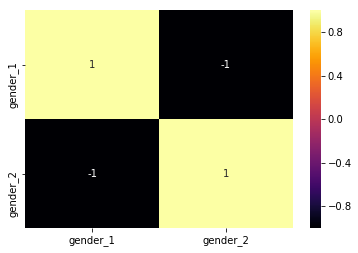

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(Cleaned_ASD_df[['gender_1','gender_2']].corr(),cmap='inferno',annot=True, cbar=True)
plt.show()

##### This shows that GENDER_1 and GENDER_2 are highly negatively co-related with each other.

#### ***Fixing JAUNDICE variable***

In [58]:
Cleaned_ASD_df['jaundice'].value_counts()

no     935
yes    165
Name: jaundice, dtype: int64

##### JAUNDICE is a Binary Nominal variable with NO that is represented as 0 and YES as 1.

In [59]:
Cleaned_ASD_df = feature_encoding(Cleaned_ASD_df,'jaundice','oh')

In [60]:
Cleaned_ASD_df.head()

,age,gender_1,gender_2,ethnicity,jaundice_1,jaundice_2,parents_with_autism,whos_taking_test,country_of_res,used_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6.0,1,0,Others,1,0,no,Parent,Jordan,no,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
1,6.0,1,0,'Middle Eastern ',1,0,no,Parent,Jordan,no,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
2,6.0,1,0,NaN,1,0,no,NaN,Jordan,yes,'4-11 years',1,1,0,0,0,1,1,1,0,0,5,NO
3,5.0,0,1,NaN,0,1,no,NaN,Jordan,no,'4-11 years',0,1,0,0,1,1,0,0,0,1,4,NO
4,5.0,1,0,Others,0,1,no,Parent,'United States',no,'4-11 years',1,1,1,1,1,1,1,1,1,1,10,YES


In [61]:
Cleaned_ASD_df['jaundice_1'].value_counts()

1    935
0    165
Name: jaundice_1, dtype: int64

In [62]:
Cleaned_ASD_df['jaundice_2'].value_counts()

0    935
1    165
Name: jaundice_2, dtype: int64

#### ***Fixing Parents_with_Autism***

In [63]:
Cleaned_ASD_df['parents_with_autism'].value_counts()

no     946
yes    154
Name: parents_with_autism, dtype: int64

##### Parents_with_autism is a Binary Nominal Variable where No is represented as 0 and Yes as 1.

In [64]:
Cleaned_ASD_df = feature_encoding(Cleaned_ASD_df,'parents_with_autism','oh')

In [65]:
Cleaned_ASD_df['parents_with_autism_1'].value_counts()

1    946
0    154
Name: parents_with_autism_1, dtype: int64

In [66]:
Cleaned_ASD_df['parents_with_autism_2'].value_counts()

0    946
1    154
Name: parents_with_autism_2, dtype: int64

#### ***Fixing Used_app_before***

In [67]:
Cleaned_ASD_df['used_app_before'].value_counts()

no     1073
yes      27
Name: used_app_before, dtype: int64

##### Used_app_before is a Binary Nominal Variable where No is represented as 0 and Yes as 1.

In [68]:
Cleaned_ASD_df = feature_encoding(Cleaned_ASD_df,'used_app_before','oh')

In [69]:
Cleaned_ASD_df['used_app_before_1'].value_counts()

1    1073
0      27
Name: used_app_before_1, dtype: int64

In [70]:
Cleaned_ASD_df['used_app_before_2'].value_counts()

0    1073
1      27
Name: used_app_before_2, dtype: int64

#### ***Fixing Age_desc***

In [71]:
Cleaned_ASD_df.head()

,age,gender_1,gender_2,ethnicity,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,whos_taking_test,country_of_res,used_app_before_1,used_app_before_2,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6.0,1,0,Others,1,0,1,0,Parent,Jordan,1,0,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
1,6.0,1,0,'Middle Eastern ',1,0,1,0,Parent,Jordan,1,0,'4-11 years',1,1,0,0,1,1,0,1,0,0,5,NO
2,6.0,1,0,NaN,1,0,1,0,NaN,Jordan,0,1,'4-11 years',1,1,0,0,0,1,1,1,0,0,5,NO
3,5.0,0,1,NaN,0,1,1,0,NaN,Jordan,1,0,'4-11 years',0,1,0,0,1,1,0,0,0,1,4,NO
4,5.0,1,0,Others,0,1,1,0,Parent,'United States',1,0,'4-11 years',1,1,1,1,1,1,1,1,1,1,10,YES


In [72]:
Cleaned_ASD_df['age_desc'].value_counts()

'18 and more'    704
'4-11 years'     292
'12-16 years'     97
'12-15 years'      7
Name: age_desc, dtype: int64

##### Age_Desc is an Ordinal Categorical Variable. And, below points needs to be clarified related to this variable:
* Q1. Why we have '12-15 years' category when we have '12-16 years' category?
    * Is it a typing error?
* Q2. Why we don't have any AGE category for 17 year old patients?
    * Is it a typing error?
    * Or, we don't have any patient with age as 17 years?

In [73]:
Cleaned_ASD_df[Cleaned_ASD_df['age_desc'] == "'4-11 years'"]['age'].value_counts()

4.0     92
5.0     45
6.0     39
7.0     27
11.0    26
8.0     21
9.0     20
10.0    18
Name: age, dtype: int64

In [74]:
Cleaned_ASD_df[Cleaned_ASD_df['age_desc'] == "'12-15 years'"]['age'].value_counts()

16.0    3
15.0    3
12.0    1
Name: age, dtype: int64

In [75]:
Cleaned_ASD_df[Cleaned_ASD_df['age_desc'] == "'12-16 years'"]['age'].value_counts()

16.0    28
12.0    24
13.0    16
15.0    15
14.0    14
Name: age, dtype: int64

##### Thus, the above results proves that '12-15 years' and '12-16 years' categories both contains the same age group data values.

In [76]:
Cleaned_ASD_df[Cleaned_ASD_df['age_desc'] == "'18 and more'"]['age'].value_counts().sort_index()

17.0     18
18.0     31
19.0     35
20.0     46
21.0     49
22.0     37
23.0     37
24.0     34
25.0     27
26.0     28
27.0     31
28.0     24
29.0     27
30.0     30
31.0     21
32.0     18
33.0     16
34.0     12
35.0     17
36.0     13
37.0     17
38.0     12
39.0      7
40.0     16
41.0      3
42.0     15
43.0     11
44.0     10
45.0      4
46.0      6
47.0      8
48.0      4
49.0      3
50.0      5
51.0      1
52.0      5
53.0      6
54.0      2
55.0      6
56.0      2
58.0      2
59.0      1
60.0      1
61.0      2
64.0      1
383.0     1
Name: age, dtype: int64

##### Here, the above result shows that category '18 and more' actually contains the patient records from age of 17 years.

In [77]:
Cleaned_ASD_df['age_desc'] = Cleaned_ASD_df['age_desc'].apply(lambda val: "'12-16 years'" if val == "'12-15 years'" else 
                                              "'17 and more'" if val == "'18 and more'" else val)

In [78]:
Cleaned_ASD_df['age_desc'].value_counts()

'17 and more'    704
'4-11 years'     292
'12-16 years'    104
Name: age_desc, dtype: int64

In [79]:
Cleaned_ASD_df = feature_encoding(Cleaned_ASD_df,'age_desc','o')

In [80]:
Cleaned_ASD_df.head()

,age,gender_1,gender_2,ethnicity,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,whos_taking_test,country_of_res,used_app_before_1,used_app_before_2,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6.0,1,0,Others,1,0,1,0,Parent,Jordan,1,0,1,1,1,0,0,1,1,0,1,0,0,5,NO
1,6.0,1,0,'Middle Eastern ',1,0,1,0,Parent,Jordan,1,0,1,1,1,0,0,1,1,0,1,0,0,5,NO
2,6.0,1,0,NaN,1,0,1,0,NaN,Jordan,0,1,1,1,1,0,0,0,1,1,1,0,0,5,NO
3,5.0,0,1,NaN,0,1,1,0,NaN,Jordan,1,0,1,0,1,0,0,1,1,0,0,0,1,4,NO
4,5.0,1,0,Others,0,1,1,0,Parent,'United States',1,0,1,1,1,1,1,1,1,1,1,1,1,10,YES


In [81]:
Cleaned_ASD_df['age_desc'].value_counts()

3    704
1    292
2    104
Name: age_desc, dtype: int64

#### ***Fixing ASD_Label***

In [82]:
Cleaned_ASD_df['ASD_Label'].value_counts()

NO     707
YES    393
Name: ASD_Label, dtype: int64

##### ASD_Label is a Binary Nominal Variable where 0 and 1 denotes No and Yes respectively.

In [83]:
Cleaned_ASD_df = feature_encoding(Cleaned_ASD_df,'ASD_Label','l')

In [84]:
Cleaned_ASD_df.head()

,age,gender_1,gender_2,ethnicity,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,whos_taking_test,country_of_res,used_app_before_1,used_app_before_2,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6.0,1,0,Others,1,0,1,0,Parent,Jordan,1,0,1,1,1,0,0,1,1,0,1,0,0,5,0
1,6.0,1,0,'Middle Eastern ',1,0,1,0,Parent,Jordan,1,0,1,1,1,0,0,1,1,0,1,0,0,5,0
2,6.0,1,0,NaN,1,0,1,0,NaN,Jordan,0,1,1,1,1,0,0,0,1,1,1,0,0,5,0
3,5.0,0,1,NaN,0,1,1,0,NaN,Jordan,1,0,1,0,1,0,0,1,1,0,0,0,1,4,0
4,5.0,1,0,Others,0,1,1,0,Parent,'United States',1,0,1,1,1,1,1,1,1,1,1,1,1,10,1


In [85]:
Cleaned_ASD_df['ASD_Label'].value_counts()

0    707
1    393
Name: ASD_Label, dtype: int64

### ***Standardizing COUNTRY_OF_RES***

In [86]:
Cleaned_ASD_df.head()

,age,gender_1,gender_2,ethnicity,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,whos_taking_test,country_of_res,used_app_before_1,used_app_before_2,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,6.0,1,0,Others,1,0,1,0,Parent,Jordan,1,0,1,1,1,0,0,1,1,0,1,0,0,5,0
1,6.0,1,0,'Middle Eastern ',1,0,1,0,Parent,Jordan,1,0,1,1,1,0,0,1,1,0,1,0,0,5,0
2,6.0,1,0,NaN,1,0,1,0,NaN,Jordan,0,1,1,1,1,0,0,0,1,1,1,0,0,5,0
3,5.0,0,1,NaN,0,1,1,0,NaN,Jordan,1,0,1,0,1,0,0,1,1,0,0,0,1,4,0
4,5.0,1,0,Others,0,1,1,0,Parent,'United States',1,0,1,1,1,1,1,1,1,1,1,1,1,10,1


In [87]:
Cleaned_ASD_df['country_of_res'].value_counts()

'United States'            167
'United Kingdom'           155
India                      130
'New Zealand'               95
'United Arab Emirates'      90
Jordan                      68
Australia                   52
Canada                      25
Afghanistan                 17
'Sri Lanka'                 14
Egypt                       14
Argentina                   14
Netherlands                 13
France                      12
Brazil                      12
Austria                     11
Bangladesh                  10
Russia                      10
Mexico                      10
'Saudi Arabia'               8
Philippines                  8
Italy                        7
Malaysia                     7
Iran                         7
Pakistan                     7
Ireland                      7
'Viet Nam'                   6
Armenia                      5
Germany                      5
'South Africa'               5
Belgium                      5
AmericanSamoa                4
Romania 

##### Here, the above result shows that COUNTRY_OF_RES is a Nominal Variable with a very high cardinality. 

In [88]:
def remove_punctuations(val):
    """
    Description: This function removes the extra quotes from the input.
    
    Input: It accepts only one parameter:
        - val: Input data string
    
    Return: Data string with no quotes
    """
    return val.replace("'",'')

In [89]:
Cleaned_ASD_df['country_of_res'] = Cleaned_ASD_df['country_of_res'].apply(lambda val: str(''.join(list(map(remove_punctuations,val)))).capitalize())

In [90]:
Cleaned_ASD_df['country_of_res'].value_counts()

United states            167
United kingdom           155
India                    130
New zealand               95
United arab emirates      90
Jordan                    68
Australia                 52
Canada                    25
Afghanistan               17
Argentina                 14
Egypt                     14
Sri lanka                 14
Netherlands               13
Brazil                    12
France                    12
Austria                   11
Bangladesh                10
Mexico                    10
Russia                    10
Philippines                8
Saudi arabia               8
Ireland                    7
Italy                      7
Malaysia                   7
Pakistan                   7
Iran                       7
Viet nam                   6
Germany                    5
South africa               5
Armenia                    5
Belgium                    5
Indonesia                  4
Romania                    4
Americansamoa              4
Iraq          

##### Due to high cardinality in COUNTRY_OF_RES binary encoding will best suit this feature. Will apply the same after filling Missing values in WHOS_TAKING_TEST.

#### ***Fixing WHOS_TAKING_TEST***

In [91]:
Cleaned_ASD_df['whos_taking_test'].value_counts()

Self                          571
Parent                        300
Relative                       53
'Health care professional'     23
Others                          8
self                            1
Name: whos_taking_test, dtype: int64

##### ***Standardizing WHOS_TAKING_TEST***

In [92]:
Cleaned_ASD_df['whos_taking_test'] = Cleaned_ASD_df['whos_taking_test'].apply(lambda val: str(val).replace("'",'').capitalize())

In [93]:
Cleaned_ASD_df['whos_taking_test'].value_counts()

Self                        572
Parent                      300
Nan                         144
Relative                     53
Health care professional     23
Others                        8
Name: whos_taking_test, dtype: int64

In [94]:
def fix_whos_taking_test(df,fill_col,supp_col,key_col):
    """
    Description: This function is filling the missing values in Whos_taking_test variable.
    
    Input: This function accepts below parameter:
        - df: Pandas DataFrame with the records
        - fill_col: Column in which missing values to be filled
        - supp_col: Categorical column on the basis of which MAX value to be found 
        - key_col: Column which will be used as a key to join with the Parent DataFrame
    
    Return: Returns the modified DataFrame with no missing values.
    """
    # Finding the count of every value in Whos_taking_test for every Age_Desc in a descending order
    age_desc_vals = pd.DataFrame(df.groupby([supp_col,fill_col]).count()[key_col]).sort_values(by=[supp_col,fill_col],ascending=False)
    age_desc_vals.reset_index(inplace=True)
    # Creating a DataFrame having Maximum count of Whos_taking_test category for each Age_desc
    max_whos_taking_test = pd.DataFrame(age_desc_vals.groupby([supp_col])[key_col].max())
    max_whos_taking_test.reset_index(inplace=True)
    # Finding the MAX occurences of categories in Whos_taking_test w.r.t all Age_Desc
    whos_taking_test_per_age_desc = pd.merge(max_whos_taking_test,age_desc_vals,on=key_col)
    temp_col = supp_col+'_y'
    whos_taking_test_per_age_desc.drop([temp_col],inplace=True,axis=1)
    whos_taking_test_per_age_desc.columns = ['age_desc','number_of_times','person_took_test']
    # Segregating Not Nulls and Nulls records of Whos_taking_test 
    Not_null_whos_taking_test = df[df[fill_col] != 'Nan']
    Null_whos_taking_test = df[df[fill_col] == 'Nan']
    # Fixing the Nulls of Whos_taking_test
    Null_fix_whos_taking_test = pd.merge(Null_whos_taking_test,whos_taking_test_per_age_desc,on=supp_col)
    Null_fix_whos_taking_test.drop(['number_of_times',fill_col],axis=1,inplace=True)
    # Renaming the last column
    cols = Null_fix_whos_taking_test.columns[0:-1]
    cols = cols[::-1]
    cols = cols.insert(0,fill_col)
    cols = cols[::-1]
    Null_fix_whos_taking_test.columns = cols
    # Create the fixed DataFrame
    Not_null_whos_taking_test.reset_index(drop=True,inplace=True)
    df_with_no_missing_vals = pd.concat([Not_null_whos_taking_test,Null_fix_whos_taking_test],axis=0,sort=True)
    df_with_no_missing_vals.reset_index(drop=True,inplace=True)
    return df_with_no_missing_vals

In [95]:
%%time
Cleaned_ASD_df = fix_whos_taking_test(Cleaned_ASD_df,'whos_taking_test','age_desc','age')

CPU times: user 26.6 ms, sys: 0 ns, total: 26.6 ms
Wall time: 25.8 ms


### ***Units for measuring performance***

\begin{align*}
10^{-3} milliseconds \\
10^{-6} microseconds \\
10^{-9} nanoseconds
\end{align*}

In [96]:
Cleaned_ASD_df.head()

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res,ethnicity,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,screening_score,used_app_before_1,used_app_before_2,whos_taking_test
0,0,0,1,1,0,0,1,1,0,1,0,6.0,1,Jordan,Others,1,0,1,0,1,0,5,1,0,Parent
1,0,0,1,1,0,0,1,1,0,1,0,6.0,1,Jordan,'Middle Eastern ',1,0,1,0,1,0,5,1,0,Parent
2,1,1,1,1,1,1,1,1,1,1,1,5.0,1,United states,Others,1,0,0,1,1,0,10,1,0,Parent
3,1,1,1,0,1,1,1,1,0,1,0,5.0,1,United kingdom,White-European,1,0,1,0,1,0,7,1,0,Parent
4,1,0,1,1,1,1,1,1,1,1,0,5.0,1,Bahrain,Middle Eastern ',0,1,1,0,1,0,8,1,0,Parent


In [97]:
Cleaned_ASD_df['whos_taking_test'].value_counts()

Self                        673
Parent                      343
Relative                     53
Health care professional     23
Others                        8
Name: whos_taking_test, dtype: int64

#### ***Remaining NULL values that needs to be fixed***

In [98]:
Cleaned_ASD_df.isin(['','?',np.NaN]).sum()

ASD_Label                  0
Q10_Score                  0
Q1_Score                   0
Q2_Score                   0
Q3_Score                   0
Q4_Score                   0
Q5_Score                   0
Q6_Score                   0
Q7_Score                   0
Q8_Score                   0
Q9_Score                   0
age                        6
age_desc                   0
country_of_res             0
ethnicity                144
gender_1                   0
gender_2                   0
jaundice_1                 0
jaundice_2                 0
parents_with_autism_1      0
parents_with_autism_2      0
screening_score            0
used_app_before_1          0
used_app_before_2          0
whos_taking_test           0
dtype: int64

#### ***Fixing ETHNICITY variable***

In [99]:
Cleaned_ASD_df['ethnicity'].value_counts()

White-European       381
Asian                185
'Middle Eastern '    127
Black                 65
'South Asian'         60
Others                56
Latino                33
Hispanic              25
Pasifika              14
Turkish                8
others                 1
Middle Eastern '       1
Name: ethnicity, dtype: int64

In [100]:
Cleaned_ASD_df[Cleaned_ASD_df['ethnicity'].isna()]['whos_taking_test'].value_counts()

Self      101
Parent     43
Name: whos_taking_test, dtype: int64

##### Here, we found that for 144 records both ETHNICITY and WHOS_TAKING_TEST are missing.
* 101 are NULL where WHOS_TAKING TEST is Self
* 43 are NULL where WHOS_TAKING_TEST is Parent

In [101]:
Cleaned_ASD_df[Cleaned_ASD_df['ethnicity'].isna()]['country_of_res'].value_counts()

Jordan                  52
United arab emirates    17
Egypt                    8
Russia                   8
Afghanistan              5
Iran                     5
Saudi arabia             5
New zealand              5
Pakistan                 4
Kazakhstan               3
Qatar                    3
Lebanon                  3
Argentina                3
Syria                    2
Austria                  2
Iraq                     2
Libya                    2
China                    1
Brazil                   1
Japan                    1
Belgium                  1
Latvia                   1
United states            1
Americansamoa            1
Albania                  1
Azerbaijan               1
Malaysia                 1
Ukraine                  1
Hong kong                1
United kingdom           1
Kuwait                   1
Bahamas                  1
Name: country_of_res, dtype: int64

##### Here, we found out the **Countries** where **Ethnicity** is missing.

In [102]:
def fix_ethnicity(df,fill_col,supp_col,key_col):
    """
    Description: This function is filling the missing values in Ethnicity variable.
    
    Input: This function accepts below parameter:
        - df: Pandas DataFrame with the records
        - fill_col: Column in which missing values to be filled
        - supp_col: Categorical column on the basis of which MAX value to be found 
        - key_col: Column which will be used as a key to join with the Parent DataFrame
    
    Return: None, but create a new 'fix_ethnicity' column in the DataFrame.
    """
    country_ethnicity_count = pd.DataFrame(df[~df[fill_col].isna()].groupby([supp_col,fill_col])[key_col].count())
    country_ethnicity_count.reset_index(inplace=True)
    country_ethnicity_count = country_ethnicity_count.sort_values([supp_col,key_col],ascending=[True,False])
    country_ethnicity_count[fill_col] = country_ethnicity_count[fill_col].apply(lambda val: str(val).replace("'",'').replace("-",' ').strip().capitalize())
    
    country_max_ethnicity = pd.DataFrame(country_ethnicity_count.groupby([supp_col])[key_col].max())
    country_max_ethnicity.reset_index(inplace=True)
    
    countries_ethnicities = pd.merge(country_max_ethnicity,country_ethnicity_count,on=[supp_col,key_col])
    countries_ethnicities.columns = ['country','ethnicity_count','ethnicity']
    countries_ethnicities = pd.DataFrame(countries_ethnicities.groupby(['country']).first())
    countries_ethnicities.reset_index(inplace=True)
    
    df['fix_ethnicity'] = df[[supp_col,fill_col]].apply(lambda val: countries_ethnicities[countries_ethnicities['country'] == val[supp_col]][fill_col] if str(val[fill_col]).lower() == 'nan' else str(val[fill_col]).replace("'",'').replace("-",' ').strip().capitalize(),axis=1)
    df['fix_ethnicity'] = df['fix_ethnicity'].apply(lambda val: 'Others' if str(val).strip() == "[]" else str(val).replace("[",'').replace("]",'').replace("'",''))
    return None

In [103]:
fix_ethnicity(Cleaned_ASD_df,'ethnicity','country_of_res','age_desc')

#### ***Frequency distribution of ETHNICITY before and after fix***

In [104]:
Cleaned_ASD_df['ethnicity'].value_counts()

White-European       381
Asian                185
'Middle Eastern '    127
Black                 65
'South Asian'         60
Others                56
Latino                33
Hispanic              25
Pasifika              14
Turkish                8
others                 1
Middle Eastern '       1
Name: ethnicity, dtype: int64

In [105]:
Cleaned_ASD_df['fix_ethnicity'].value_counts()

White european    393
Middle eastern    224
Asian             193
Others             79
Black              66
South asian        61
Latino             34
Hispanic           28
Pasifika           14
Turkish             8
Name: fix_ethnicity, dtype: int64

In [106]:
Cleaned_ASD_df.drop(['ethnicity'],axis=1,inplace=True)

In [107]:
Cleaned_ASD_df.isin(['?','',np.NaN]).sum()

ASD_Label                0
Q10_Score                0
Q1_Score                 0
Q2_Score                 0
Q3_Score                 0
Q4_Score                 0
Q5_Score                 0
Q6_Score                 0
Q7_Score                 0
Q8_Score                 0
Q9_Score                 0
age                      6
age_desc                 0
country_of_res           0
gender_1                 0
gender_2                 0
jaundice_1               0
jaundice_2               0
parents_with_autism_1    0
parents_with_autism_2    0
screening_score          0
used_app_before_1        0
used_app_before_2        0
whos_taking_test         0
fix_ethnicity            0
dtype: int64

In [108]:
Cleaned_ASD_df.head(10)

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,screening_score,used_app_before_1,used_app_before_2,whos_taking_test,fix_ethnicity
0,0,0,1,1,0,0,1,1,0,1,0,6.0,1,Jordan,1,0,1,0,1,0,5,1,0,Parent,Others
1,0,0,1,1,0,0,1,1,0,1,0,6.0,1,Jordan,1,0,1,0,1,0,5,1,0,Parent,Middle eastern
2,1,1,1,1,1,1,1,1,1,1,1,5.0,1,United states,1,0,0,1,1,0,10,1,0,Parent,Others
3,1,1,1,0,1,1,1,1,0,1,0,5.0,1,United kingdom,1,0,1,0,1,0,7,1,0,Parent,White european
4,1,0,1,1,1,1,1,1,1,1,0,5.0,1,Bahrain,0,1,1,0,1,0,8,1,0,Parent,Middle eastern
5,1,0,1,1,1,1,1,1,1,0,0,11.0,1,Bahrain,0,1,1,0,1,0,7,1,0,Parent,Middle eastern
6,1,1,1,0,0,0,1,1,1,1,1,10.0,1,United kingdom,1,0,0,1,1,0,7,1,0,Self,White european
7,1,1,0,1,1,1,1,1,1,1,1,4.0,1,United states,1,0,0,1,1,0,9,1,0,Parent,White european
8,0,0,1,0,0,0,0,0,1,0,0,4.0,1,United arab emirates,0,1,1,0,1,0,2,1,0,Parent,Black
9,1,1,1,1,1,1,1,1,1,1,1,6.0,1,Europe,1,0,1,0,1,0,10,1,0,Parent,White european


### ***Encoding COUNTRY_OF_RES, WHOS_TAKING_TEST and ETHNICITY***

In [109]:
Cleaned_ASD_df = feature_encoding(Cleaned_ASD_df,'country_of_res','b')

In [110]:
Cleaned_ASD_df = feature_encoding(Cleaned_ASD_df,'whos_taking_test','b')

In [111]:
Cleaned_ASD_df = feature_encoding(Cleaned_ASD_df,'fix_ethnicity','b')

In [112]:
Cleaned_ASD_df.head()

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,screening_score,used_app_before_1,used_app_before_2,whos_taking_test_0,whos_taking_test_1,whos_taking_test_2,whos_taking_test_3,fix_ethnicity_0,fix_ethnicity_1,fix_ethnicity_2,fix_ethnicity_3,fix_ethnicity_4
0,0,0,1,1,0,0,1,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,5,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,1,0,0,1,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,5,1,0,0,0,0,1,0,0,0,1,0
2,1,1,1,1,1,1,1,1,1,1,1,5.0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,10,1,0,0,0,0,1,0,0,0,0,1
3,1,1,1,0,1,1,1,1,0,1,0,5.0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,7,1,0,0,0,0,1,0,0,0,1,1
4,1,0,1,1,1,1,1,1,1,1,0,5.0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,8,1,0,0,0,0,1,0,0,0,1,0


#### ***Fixing missing values in AGE variable***

In [113]:
Cleaned_ASD_df[Cleaned_ASD_df['age'].isna()]

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,screening_score,used_app_before_1,used_app_before_2,whos_taking_test_0,whos_taking_test_1,whos_taking_test_2,whos_taking_test_3,fix_ethnicity_0,fix_ethnicity_1,fix_ethnicity_2,fix_ethnicity_3,fix_ethnicity_4
47,0,0,0,0,1,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0
965,1,1,1,0,0,1,0,1,1,1,1,NaN,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,7,1,0,0,0,0,1,0,0,0,1,0
977,1,1,1,1,1,1,0,1,0,1,0,NaN,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,7,1,0,0,0,0,1,0,0,0,1,0
978,0,0,0,1,1,0,1,1,1,1,0,NaN,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,6,0,1,0,0,0,1,0,0,0,0,1
1013,0,0,0,0,0,0,0,0,0,0,0,NaN,3,0,0,1,0,0,0,1,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1017,0,1,0,1,0,0,1,0,1,0,0,NaN,3,0,0,0,0,0,0,0,1,0,1,1,0,1,0,4,1,0,0,0,1,0,0,0,0,1,0


#### **Finding out co-relation between the variables**

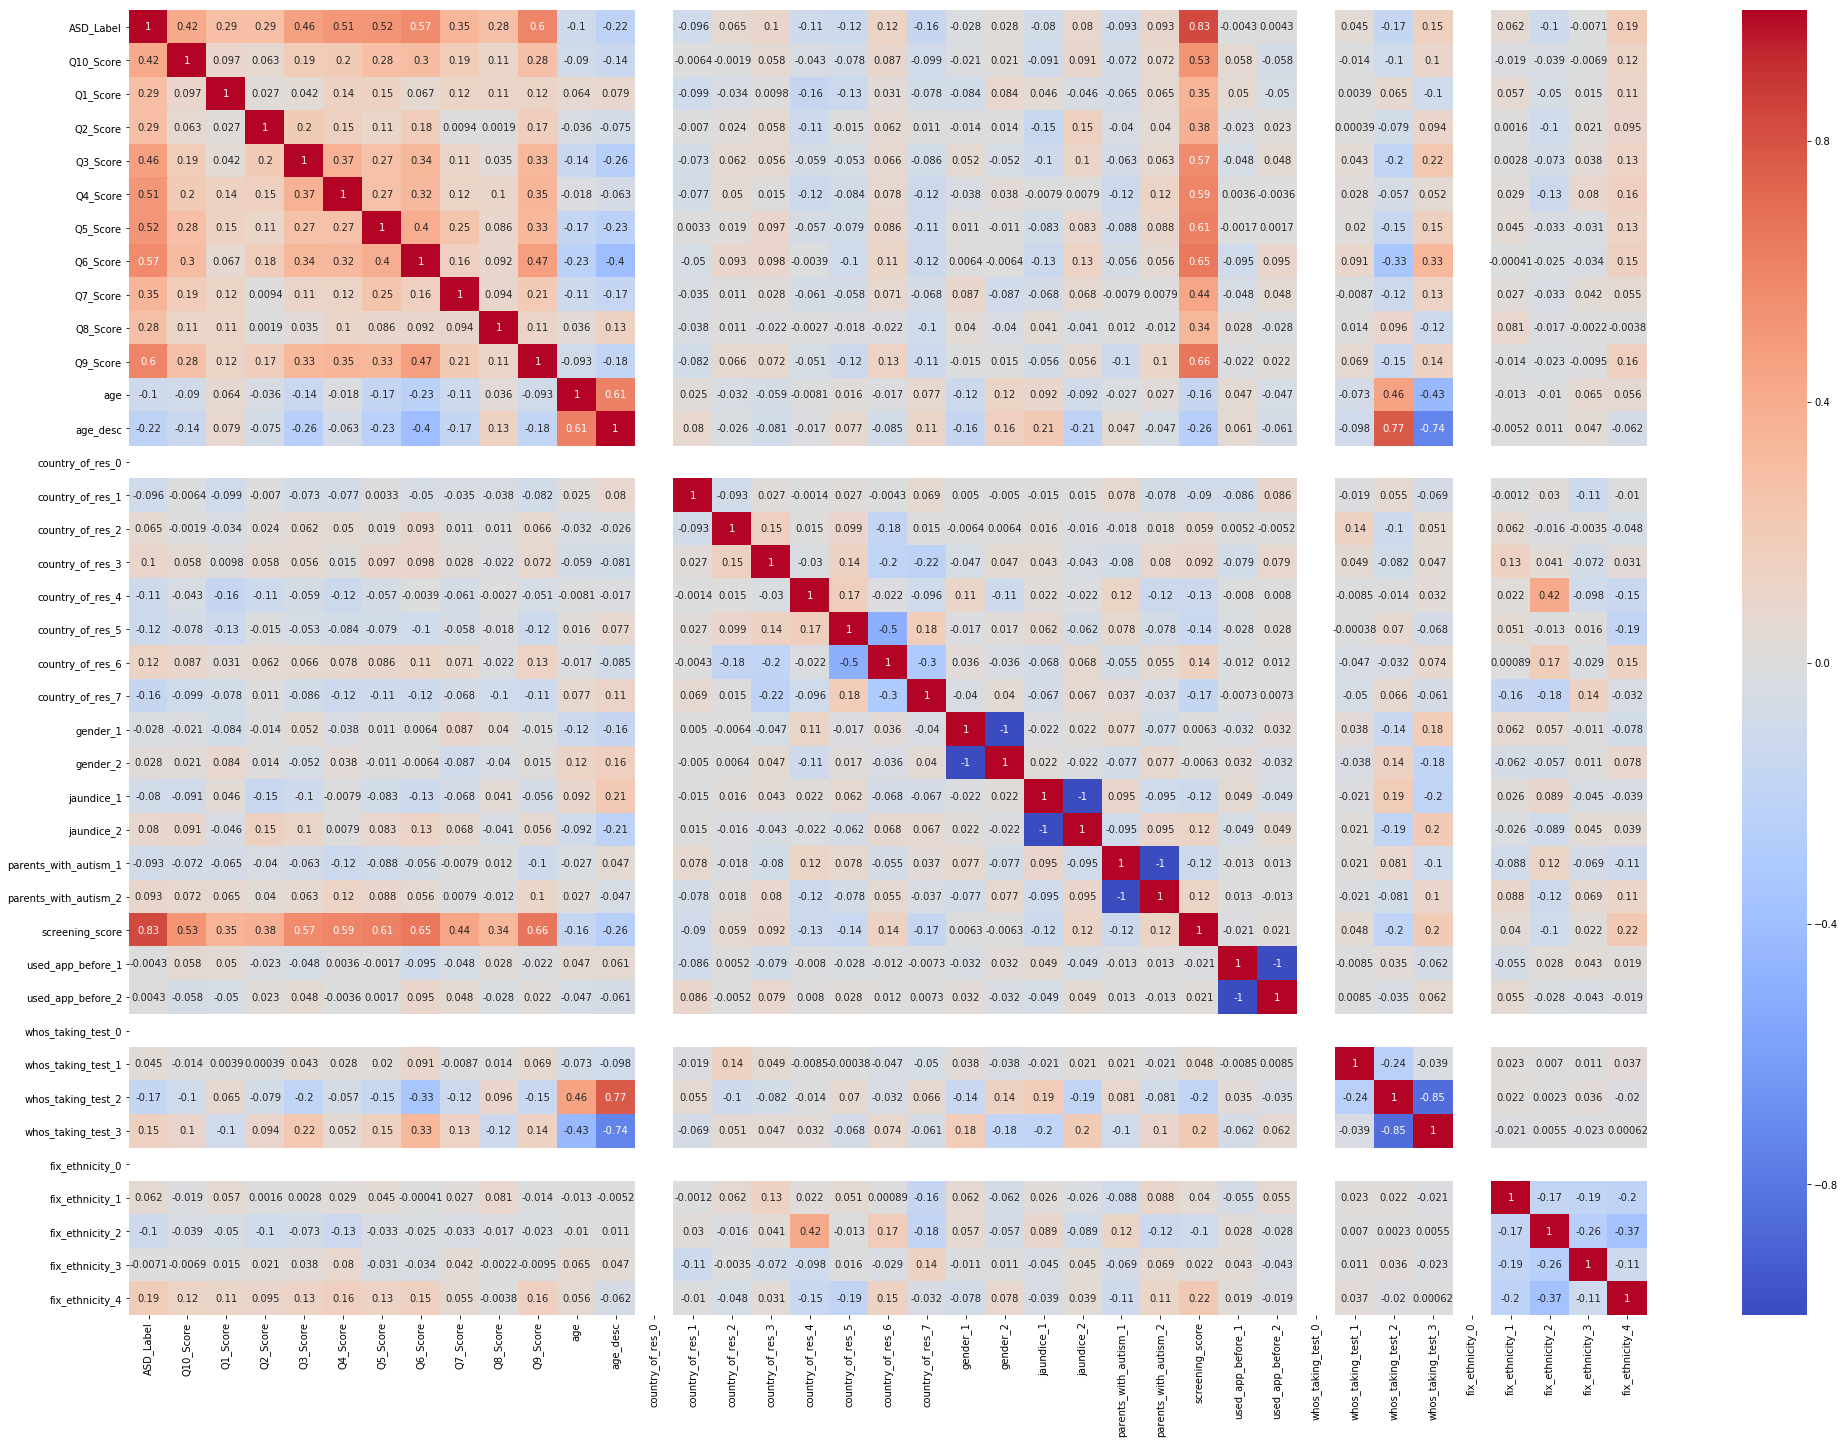

In [114]:
plt.figure(figsize=(34,24))
sns.heatmap(Cleaned_ASD_df.corr(),cbar=True,cmap='coolwarm',annot=True)
plt.show()

##### **As SCREENING_SCORE is highly co-related with FIX_ASD_LABEL.**

In [115]:
Cleaned_ASD_df.drop(['screening_score'],axis=1,inplace=True)

#### **Predicting the values for NULL values in AGE variable**

In [116]:
ASD_age_not_null = Cleaned_ASD_df[~Cleaned_ASD_df['age'].isna()]

In [117]:
ASD_age_not_null.shape

(1094, 38)

In [118]:
ASD_age_null = Cleaned_ASD_df[Cleaned_ASD_df['age'].isna()]

In [119]:
ASD_age_null.shape

(6, 38)

#### **Import the Algo to train and predict the MISSING values in AGE**

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [121]:
Cleaned_ASD_df.head()

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,used_app_before_1,used_app_before_2,whos_taking_test_0,whos_taking_test_1,whos_taking_test_2,whos_taking_test_3,fix_ethnicity_0,fix_ethnicity_1,fix_ethnicity_2,fix_ethnicity_3,fix_ethnicity_4
0,0,0,1,1,0,0,1,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,1,0,0,1,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1,1,1,1,1,1,1,1,1,1,1,5.0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
3,1,1,1,0,1,1,1,1,0,1,0,5.0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1
4,1,0,1,1,1,1,1,1,1,1,0,5.0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [122]:
X_ASD_age_not_null = ASD_age_not_null[['ASD_Label', 'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score','Q5_Score', 'Q6_Score', 
       'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score',
       'country_of_res_0', 'country_of_res_1', 'country_of_res_2','country_of_res_3', 'country_of_res_4', 'country_of_res_5',
       'country_of_res_6', 'country_of_res_7', 
       'age_desc', 'jaundice_1','jaundice_2',
       'parents_with_autism_1', 'parents_with_autism_2','used_app_before_1', 'used_app_before_2',
       'gender_1','gender_2', 'whos_taking_test_0', 'whos_taking_test_1','whos_taking_test_2', 'whos_taking_test_3', 
       'fix_ethnicity_0','fix_ethnicity_1', 'fix_ethnicity_2', 'fix_ethnicity_3','fix_ethnicity_4']]

In [123]:
Y_ASD_age_not_null = ASD_age_not_null['age']

#### **Splitting the train and test dataset**

In [124]:
X_train, X_test, y_train, y_test = tts(X_ASD_age_not_null,Y_ASD_age_not_null,test_size=0.25,random_state=44)

#### **Shape of training and testing datasets**

In [125]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((820, 37), (820,), (274, 37), (274,))

#### **Instantiating the Regression model**

In [126]:
rf_reg = RandomForestRegressor(n_estimators=100,max_depth=8)

#### **Fitting the model**

In [127]:
model_rf = rf_reg.fit(X_train,y_train)

#### **Predicting the values on testing dataset**

In [128]:
y_predict = model_rf.predict(X_test)

#### **Predicting the values on unseen dataset**

In [129]:
model_rf.predict(ASD_age_null[['ASD_Label', 'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score','Q5_Score', 'Q6_Score', 
       'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score',
       'country_of_res_0', 'country_of_res_1', 'country_of_res_2','country_of_res_3', 'country_of_res_4', 'country_of_res_5',
       'country_of_res_6', 'country_of_res_7', 
       'age_desc', 'jaundice_1','jaundice_2',
       'parents_with_autism_1', 'parents_with_autism_2','used_app_before_1', 'used_app_before_2',
       'gender_1','gender_2', 'whos_taking_test_0', 'whos_taking_test_1','whos_taking_test_2', 'whos_taking_test_3', 
       'fix_ethnicity_0','fix_ethnicity_1', 'fix_ethnicity_2', 'fix_ethnicity_3','fix_ethnicity_4']])

array([ 6.73185217,  7.98106919,  6.80270355,  5.008244  , 29.34291444,
       27.59940798])

In [130]:
MAE(y_test,np.floor(y_predict))

6.065693430656935

#### **Support Vector Regressor**

In [131]:
from sklearn.svm import SVR

In [132]:
svr = SVR(gamma='scale')

In [133]:
model_svr = svr.fit(X_train,y_train)

In [134]:
y_predict_svr = svr.predict(X_test)

In [135]:
np.sqrt(MSE(y_test,y_predict_svr))

23.24087340853427

#### **Gradient Boosting Regressor**

In [136]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [137]:
gbr = GBR(loss='lad',n_estimators=200)

In [138]:
model_gbr = gbr.fit(X_train,y_train)

In [139]:
y_predict_gbr = model_gbr.predict(X_test)

In [140]:
np.sqrt(MSE(y_test,y_predict_gbr))

22.991264545151047

#### **XGBoost Regressor**

In [141]:
!pip install xgboost

You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [142]:
from xgboost import XGBRFRegressor as XGR

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/distributed/config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


In [143]:
xgr = XGR(learning_rate=1)

In [144]:
model_xgr = xgr.fit(X_train,y_train)

In [145]:
y_predict_xgr = xgr.predict(X_test)

In [146]:
np.sqrt(np.floor(MSE(y_test,y_predict_xgr)))

22.67156809750927

In [147]:
age_prediction = model_xgr.predict(ASD_age_null[['ASD_Label', 'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score','Q5_Score', 'Q6_Score', 
       'Q7_Score', 'Q8_Score', 'Q9_Score', 'Q10_Score',
       'country_of_res_0', 'country_of_res_1', 'country_of_res_2','country_of_res_3', 'country_of_res_4', 'country_of_res_5',
       'country_of_res_6', 'country_of_res_7', 
       'age_desc', 'jaundice_1','jaundice_2',
       'parents_with_autism_1', 'parents_with_autism_2','used_app_before_1', 'used_app_before_2',
       'gender_1','gender_2', 'whos_taking_test_0', 'whos_taking_test_1','whos_taking_test_2', 'whos_taking_test_3', 
       'fix_ethnicity_0','fix_ethnicity_1', 'fix_ethnicity_2', 'fix_ethnicity_3','fix_ethnicity_4']])

In [148]:
age_prediction = np.floor(age_prediction)

In [149]:
age_prediction

array([ 6.,  7.,  6.,  5., 27., 27.], dtype=float32)

#### **Replacing the Missing values AGE column by the predicted result**

In [150]:
ASD_age_null

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,used_app_before_1,used_app_before_2,whos_taking_test_0,whos_taking_test_1,whos_taking_test_2,whos_taking_test_3,fix_ethnicity_0,fix_ethnicity_1,fix_ethnicity_2,fix_ethnicity_3,fix_ethnicity_4
47,0,0,0,0,1,0,0,0,0,0,0,NaN,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
965,1,1,1,0,0,1,0,1,1,1,1,NaN,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
977,1,1,1,1,1,1,0,1,0,1,0,NaN,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0
978,0,0,0,1,1,0,1,1,1,1,0,NaN,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
1013,0,0,0,0,0,0,0,0,0,0,0,NaN,3,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1017,0,1,0,1,0,0,1,0,1,0,0,NaN,3,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [151]:
ASD_age_null.shape

(6, 38)

In [152]:
ASD_age_null['age'] = age_prediction

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [153]:
ASD_age_null

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,used_app_before_1,used_app_before_2,whos_taking_test_0,whos_taking_test_1,whos_taking_test_2,whos_taking_test_3,fix_ethnicity_0,fix_ethnicity_1,fix_ethnicity_2,fix_ethnicity_3,fix_ethnicity_4
47,0,0,0,0,1,0,0,0,0,0,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
965,1,1,1,0,0,1,0,1,1,1,1,7.0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
977,1,1,1,1,1,1,0,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0
978,0,0,0,1,1,0,1,1,1,1,0,5.0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
1013,0,0,0,0,0,0,0,0,0,0,0,27.0,3,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1017,0,1,0,1,0,0,1,0,1,0,0,27.0,3,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [154]:
ASD_age_not_null.shape

(1094, 38)

In [155]:
ASD_pre_processed = pd.concat([ASD_age_not_null,ASD_age_null],axis=0)

In [156]:
ASD_pre_processed.head()

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,used_app_before_1,used_app_before_2,whos_taking_test_0,whos_taking_test_1,whos_taking_test_2,whos_taking_test_3,fix_ethnicity_0,fix_ethnicity_1,fix_ethnicity_2,fix_ethnicity_3,fix_ethnicity_4
0,0,0,1,1,0,0,1,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,1,0,0,1,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,1,1,1,1,1,1,1,1,1,1,1,5.0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
3,1,1,1,0,1,1,1,1,0,1,0,5.0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1
4,1,0,1,1,1,1,1,1,1,1,0,5.0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0



Descriptive Statistics of Feature age in Original Form.
count    1100.000000
mean       22.023636
std        16.862431
min         4.000000
25%        11.000000
50%        21.000000
75%        30.000000
max       383.000000
Name: age, dtype: float64 



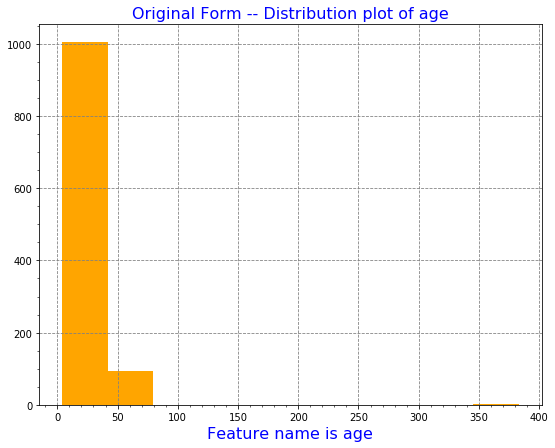

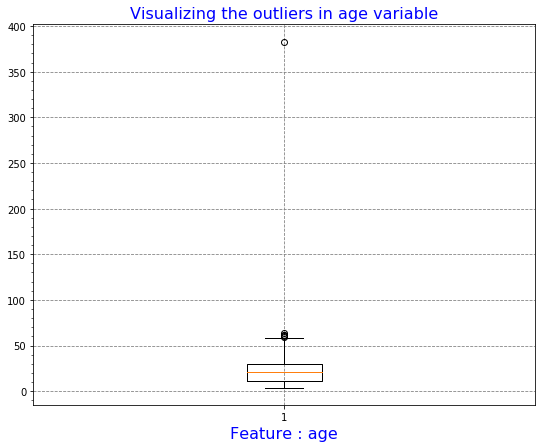



######## Applied Tuky IQR Method-I ########


Descriptive Statistics of Feature Fixed_Outliers_age in Original Form.
count    1100.000000
mean       21.566016
std        12.616034
min         4.000000
25%        11.000000
50%        21.000000
75%        29.000000
max        58.000000
Name: Fixed_Outliers_age, dtype: float64 



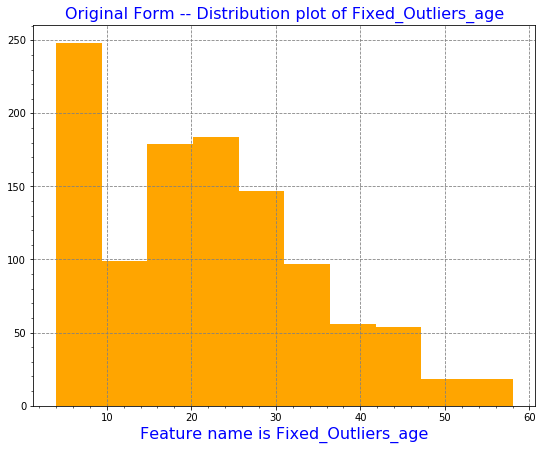

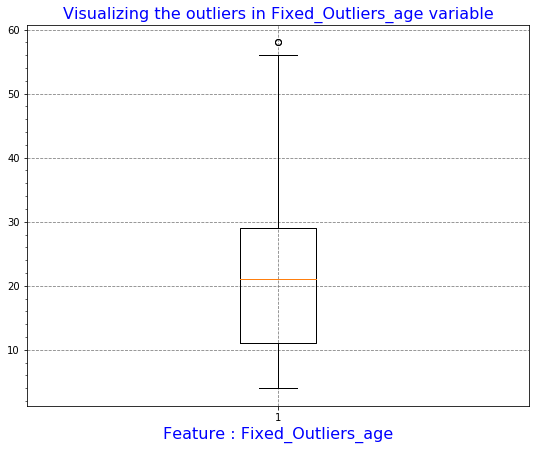



######## Applied Tuky IQR Method-II ########


Descriptive Statistics of Feature Fixed_Outliers_age in Original Form.
count    1100.000000
mean       21.562380
std        12.605807
min         4.000000
25%        11.000000
50%        21.000000
75%        29.000000
max        56.000000
Name: Fixed_Outliers_age, dtype: float64 



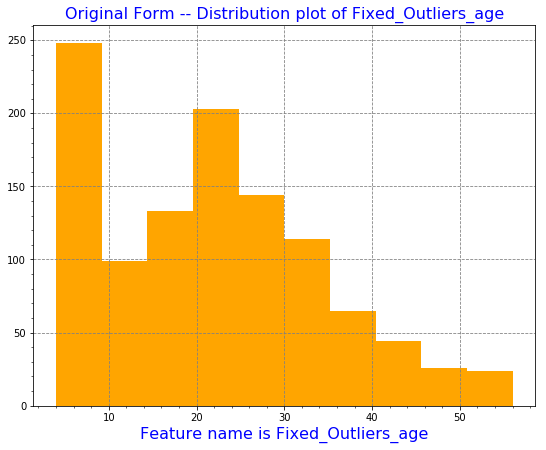

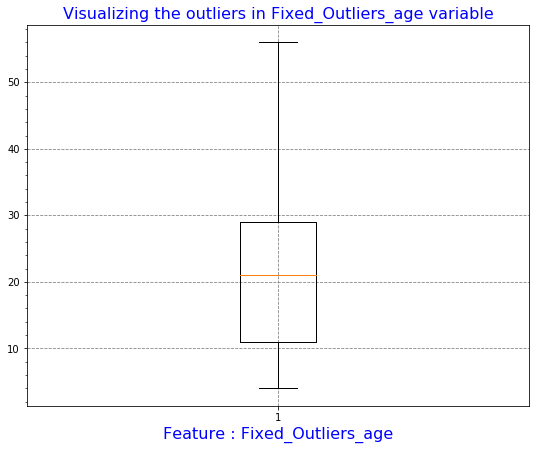



$$$$$$$$ Removed Outliers from age and created its new variable Fixed_Outliers_age $$$$$$$$



In [157]:
fix_outliers(ASD_pre_processed,'age')


Descriptive Statistics of Feature Fixed_Outliers_age in StandardScaler Form.
count    1.100000e+03
mean    -2.358719e-16
std      1.000455e+00
min     -1.393831e+00
25%     -8.382791e-01
50%     -4.463306e-02
75%      5.902837e-01
max      2.733128e+00
Name: Fixed_Outliers_age, dtype: float64 



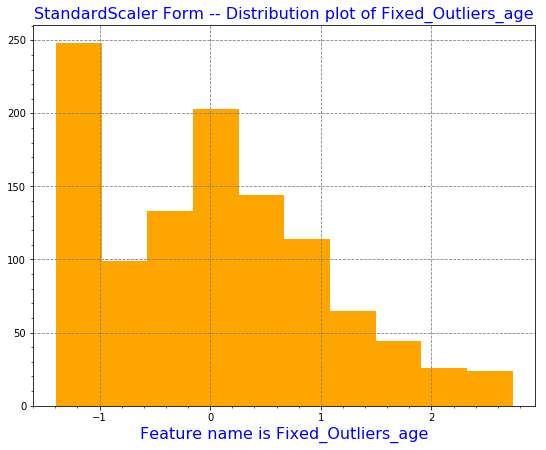


Descriptive Statistics of Feature Fixed_Outliers_age in RobustScaler Form.
count    1100.000000
mean        0.031243
std         0.700323
min        -0.944444
25%        -0.555556
50%         0.000000
75%         0.444444
max         1.944444
Name: Fixed_Outliers_age, dtype: float64 



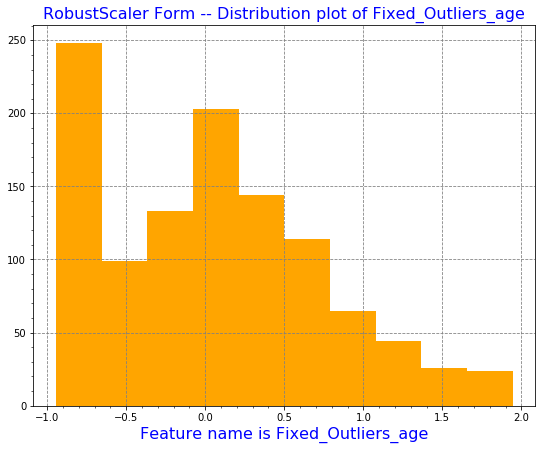


Descriptive Statistics of Feature Fixed_Outliers_age in MinMaxScaler Form.
count    1100.000000
mean        0.337738
std         0.242419
min         0.000000
25%         0.134615
50%         0.326923
75%         0.480769
max         1.000000
Name: Fixed_Outliers_age, dtype: float64 



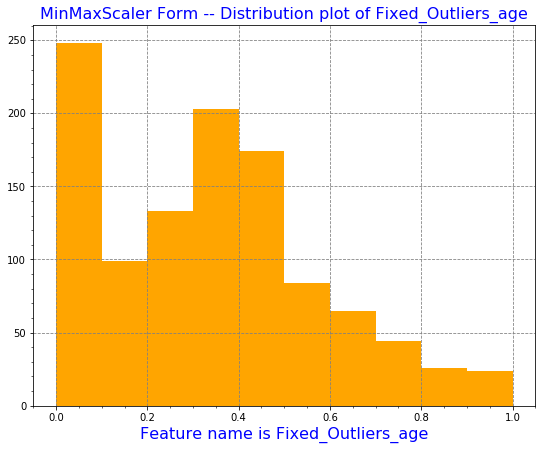

In [158]:
feature_scale_desc_stats(ASD_pre_processed,'Fixed_Outliers_age',['ss','rs','mms'])


Descriptive Statistics of Feature Fixed_Outliers_age.
count    1100.000000
mean       21.562380
std        12.605807
min         4.000000
25%        11.000000
50%        21.000000
75%        29.000000
max        56.000000
Name: Fixed_Outliers_age, dtype: float64 



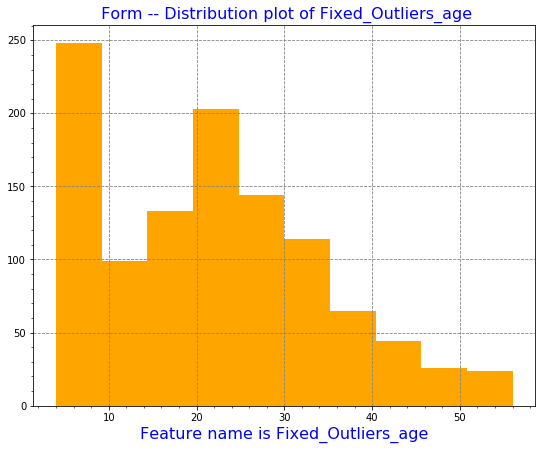

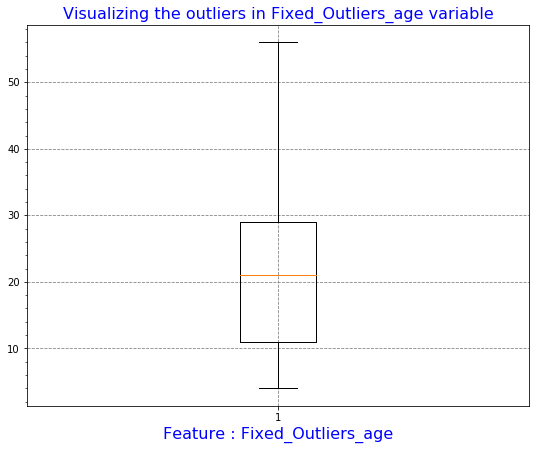



Descriptive Statistics of Feature Fixed_Outliers_age_Scaled.
count    1100.000000
mean        0.337738
std         0.242419
min         0.000000
25%         0.134615
50%         0.326923
75%         0.480769
max         1.000000
Name: Fixed_Outliers_age_Scaled, dtype: float64 



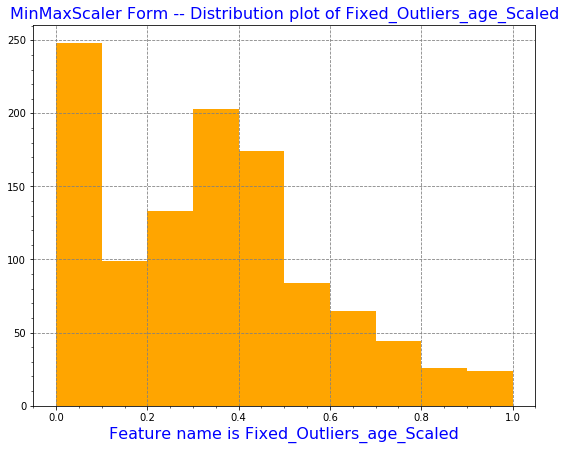

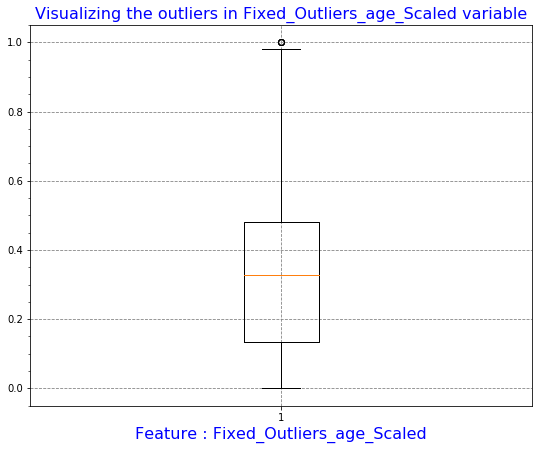



##### Scaled variable Fixed_Outliers_age_Scaled added in the DataFrame #####



In [159]:
feature_scale_desc_stats(ASD_pre_processed,'Fixed_Outliers_age',scale_col=True,scaler_to_use='mms')

In [160]:
ASD_pre_processed.head()

,ASD_Label,Q10_Score,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,age,age_desc,country_of_res_0,country_of_res_1,country_of_res_2,country_of_res_3,country_of_res_4,country_of_res_5,country_of_res_6,country_of_res_7,gender_1,gender_2,jaundice_1,jaundice_2,parents_with_autism_1,parents_with_autism_2,used_app_before_1,used_app_before_2,whos_taking_test_0,whos_taking_test_1,whos_taking_test_2,whos_taking_test_3,fix_ethnicity_0,fix_ethnicity_1,fix_ethnicity_2,fix_ethnicity_3,fix_ethnicity_4,Fixed_Outliers_age,Fixed_Outliers_age_Scaled
0,0,0,1,1,0,0,1,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,6.0,0.038462
1,0,0,1,1,0,0,1,1,0,1,0,6.0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,6.0,0.038462
2,1,1,1,1,1,1,1,1,1,1,1,5.0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,5.0,0.019231
3,1,1,1,0,1,1,1,1,0,1,0,5.0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,5.0,0.019231
4,1,0,1,1,1,1,1,1,1,1,0,5.0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,5.0,0.019231


In [161]:
ASD_pre_processed.drop(['age','Fixed_Outliers_age'],axis=1,inplace=True)

## ***Train***

In [163]:
X_train1, X_test1, y_train1, y_test1 = tts(ASD_pre_processed.iloc[:,1:],ASD_pre_processed.iloc[:,0],test_size=0.35,random_state=33)

In [164]:
X_train1.shape

(715, 37)

In [165]:
X_test1.shape

(385, 37)

### **Train data stored into the S3 location**

In [ ]:
from sklearn.datasets import dump_svmlight_file

In [198]:
dump_svmlight_file(X_train1,y_train1,'train.libsvm')

In [206]:
train_channel = prefix + '/train'

sess.upload_data(path='train.libsvm', bucket=bucket, key_prefix=train_channel)

s3_train_data = 's3://{}/{}'.format(bucket, train_channel)

### **Test data stored into the S3 location**

In [200]:
dump_svmlight_file(X_test1,y_test1,'test.libsvm')

In [201]:
test_channel = prefix + '/test'

sess.upload_data(path='test.libsvm', bucket=bucket, key_prefix=test_channel)

s3_test_data = 's3://{}/{}'.format(bucket, test_channel)

### **AWS XGBoost container import**

In [202]:
region_name = boto3.Session().region_name

container = sagemaker.amazon.amazon_estimator.get_image_uri(region_name, "xgboost")
print('Using SageMaker Xgboost container: {} ({})'.format(container, region_name))

	get_image_uri(region, 'xgboost', '0.90-1').


Using SageMaker Xgboost container: 811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:1 (us-east-1)


### **Dumping the model artifacts**

In [203]:
s3_output_location = 's3://{}/{}/output'.format(bucket, prefix)

### **Resource configuration for the Estimator**

In [231]:
xgboost_model = sagemaker.estimator.Estimator(container,
                                         role, 
                                         train_instance_count=2, 
                                         train_instance_type='ml.c4.2xlarge',
                                         train_volume_size = 5,
                                         train_max_run = 360000,
                                         input_mode= 'File',
                                         output_path=s3_output_location,
                                         sagemaker_session=sess)

### **Set Hyperparameters**

In [232]:
xgboost_model.set_hyperparameters(objective='binary:logistic',
                                  num_round=100)

### **Fit the model**

In [233]:
xgboost_model.fit({'train': s3_train_data, 'validation': s3_test_data})

2020-05-16 09:59:43 Starting - Starting the training job...
2020-05-16 09:59:45 Starting - Launching requested ML instances.........
2020-05-16 10:01:26 Starting - Preparing the instances for training......
2020-05-16 10:02:42 Downloading - Downloading input data
2020-05-16 10:02:42 Training - Downloading the training image...
2020-05-16 10:03:02 Training - Training image download completed. Training in progress.Arguments: train
[2020-05-16:10:03:00:INFO] Running distributed xgboost training.
Arguments: train
[2020-05-16:10:03:04:INFO] Number of hosts: 2, master IP address: 10.2.130.96, host IP address: 10.2.172.189.
[2020-05-16:10:03:04:INFO] Finished Yarn configuration files setup.

starting datanode, logging to /opt/amazon/hadoop/logs/hadoop--datanode-ip-10-2-172-189.ec2.internal.out
[2020-05-16:10:03:05:INFO] Running distributed xgboost training.
[2020-05-16:10:03:05:INFO] Number of hosts: 2, master IP address: 10.2.130.96, host IP address: 10.2.130.96.
[2020-05-16:10:03:05:INFO] F

### **Host or Deploy the model**

In [234]:
xgboost_endpoint = xgboost_model.deploy(initial_instance_count = 1,instance_type = 'ml.m4.xlarge')

-----------------!

### **Delete the endpoint**

In [235]:
sess.delete_endpoint(xgboost_endpoint.endpoint)

## ***Using sklearn***

In [213]:
from sklearn.metrics import accuracy_score as acr_scr
from sklearn.metrics import recall_score as rec_scr
from sklearn.metrics import precision_score as prec_scr
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [214]:
from xgboost import XGBClassifier as XGBC

In [215]:
xgbc = XGBC()

In [216]:
model_xgbc = xgbc.fit(X_train1,y_train1)

## ***Predict***

In [217]:
y_predict_xgbc = model_xgbc.predict(X_test1)

In [218]:
prec_scr(y_test1,y_predict_xgbc)

0.9366197183098591

In [219]:
rec_scr(y_test1,y_predict_xgbc)

0.9568345323741008

#### **K-fold validation**

In [220]:
cross_val_score(model_xgbc,ASD_pre_processed.iloc[:,1:],ASD_pre_processed.iloc[:,0],cv=10,n_jobs=4)

array([0.96396396, 0.97297297, 0.98198198, 0.96363636, 0.99090909,
       0.97272727, 0.99090909, 0.97247706, 0.95412844, 0.98165138])

In [221]:
np.mean(cross_val_score(model_xgbc,ASD_pre_processed.iloc[:,1:],ASD_pre_processed.iloc[:,0],cv=10,n_jobs=4))

0.9745357617834683

#### **Confusion_Matrix**

In [222]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import itertools

def calc_scores(y_true, y_pred, thresh=None):
    """
    Description: This function is created for calculating Confusion Matrix, Pred Binary, ROC_AUC, Accuracy, Recall, Precision
    and Specificity scores.
    
    Input Parameters: It accepts below input parameters:
        - y_true: Actual test data label
        - y_pred: Test data prediction
        - thresh: Threshold limit value
    
    Return: It retuns Confusion Matrix, Pred Binary, ROC_AUC, Accuracy, Recall, Precision and Specificity scores
    """
    if thresh == None:
        th_val = 0.5
    else:
        th_val = thresh
    
    y_pred_binary = np.where(y_pred > th_val, 1, 0)
    c_mat = confusion_matrix(y_test1, y_pred_binary)
    roc_auc = round(roc_auc_score(y_true, y_pred),4)
    accuracy = round(accuracy_score(y_true,(y_pred > th_val) ) ,4)
    recall = round(recall_score(y_true, (y_pred > th_val)),4)
    precision = round(precision_score(y_true, (y_pred > th_val)),4)
    specificity = round(sum((y_pred < th_val) & (y_true == 0)) /sum(y_true ==0),4)
    
    return y_pred_binary, c_mat, roc_auc, accuracy, recall, precision, specificity

y_pred_binary, c_mat, roc_auc, accuracy, recall, precision, specificity = calc_scores(y_test1,y_predict_xgbc)

class_names = ['Non ASD', 'ASD +ve']

def plot_confusion_matrix(cm, classes, title, cmap = plt.cm.gist_earth_r):
    """
    Description: This function is created for plotting the Confusion Matrix.
    
    Input Parameters: It accepts below input parameters:
        - cm: Confusion Matrix
        - classes: Target classes
        - title: Title for the plot

    Return: None
    """                                      
#     print(cm)                                                 ## Uncomment this line to view the Confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

#### **Plot Confusion Matrix**

<Figure size 432x288 with 0 Axes>

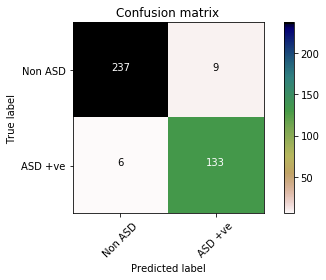

ROC AUC is: 0.9601
Accuracy is: 0.961
Recall is: 0.9568
Precision is: 0.9366
Specificity is: 0.9634


In [223]:
plt.figure()
fig, ax = plt.subplots(figsize=(6,4))
plot_confusion_matrix(c_mat, classes=class_names, title='Confusion matrix')
plt.show()
print(f'ROC AUC is: {roc_auc}')
print(f'Accuracy is: {accuracy}')
print(f'Recall is: {recall}')
print(f'Precision is: {precision}')
print(f'Specificity is: {specificity}')

In [224]:
y_test1.value_counts()

0    246
1    139
Name: ASD_Label, dtype: int64

#### **ROC_Curve**

AUC is 0.9601


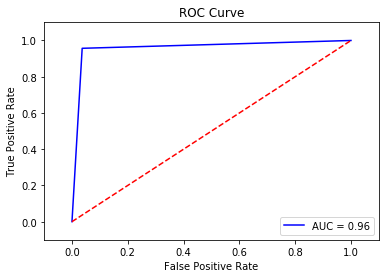

In [225]:
print('AUC is ' + str(roc_auc))

fpr, tpr, th = roc_curve(y_test1, y_predict_xgbc)

plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## **Probabilistic_Underwriting_Score**

In [226]:
u_score = model_xgbc.predict_proba(X_test1)

In [227]:
u_score = pd.DataFrame(u_score)

In [228]:
u_score = u_score.apply(lambda val: np.round(val,4))

In [229]:
u_score

,0,1
0,0.9993,0.0007
1,0.0005,0.9995
2,0.9997,0.0003
3,0.9999,0.0001
4,1.0000,0.0000
5,0.0005,0.9995
6,0.0044,0.9956
7,0.9999,0.0001
8,1.0000,0.0000
9,0.0000,1.0000
